#**Load Required Libraries**

In [ ]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gdown

In [ ]:
url = "https://drive.google.com/file/d/16tk1Lym0_yM2wUZpHfmOAtMhZ_5als8l/view?usp=sharing"
output = "Pakistan_Largest_Ecommerce_Dataset.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=16tk1Lym0_yM2wUZpHfmOAtMhZ_5als8l
To: /content/Pakistan_Largest_Ecommerce_Dataset.csv
100%|██████████| 107M/107M [00:02<00:00, 39.7MB/s]


'Pakistan_Largest_Ecommerce_Dataset.csv'

#**Load Dataset**

In [ ]:
df = pd.read_csv("/content/Pakistan_Largest_Ecommerce_Dataset.csv")
df.head()

<ipython-input-182-727d26d2a530>:1: DtypeWarning:

Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.



,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [ ]:
#Filter Column which to use

df=df[['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID']]
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


#**DATA CLEANING**

In [ ]:
#checking if there any discount with negative values
negative_discount = df['discount_amount'] < 0
df.loc[negative_discount]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
152474,403716.0,canceled,2/13/2017,akl-GFSU1265-M,5995.0,1.0,5395.5,100269243,Women's Fashion,\N,...,Payaxis,2/13/2017,Gross,"5,995",2017.0,2.0,2016-7,2-2017,FY17,73.0
152478,403730.0,order_refunded,2/13/2017,test-product,4.0,2.0,156.0,100269252,\N,\N,...,Payaxis,2/13/2017,Valid,8,2017.0,2.0,2016-7,2-2017,FY17,1423.0
152479,403731.0,canceled,2/13/2017,RB_HouseholdBundle,1000.0,5.0,4998.0,100269253,Superstore,\N,...,Payaxis,2/13/2017,Gross,"5,000",2017.0,2.0,2016-7,2-2017,FY17,73.0


In [ ]:
#replace the negative amount of discount with abs funcion
df.loc[df['discount_amount'] < 0, 'discount_amount'] = df['discount_amount'].abs()
negative_discount = df['discount_amount'] < 0
df['discount_amount'].loc[negative_discount].sum()

0.0

In [ ]:
#checking if there are any price with zero values
zero_price = df['price'] == 0
zero_price.value_counts()

False    1046343
True        2232
Name: price, dtype: int64

In [ ]:
df.loc[zero_price]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
6598,218538.0,canceled,7/26/2016,"west point_Deluxe Juicer, Blender & Grinder - ...",0.0,1.0,0.0,100152813,Appliances,\N,...,cod,7/26/2016,Gross,-,2016.0,7.0,2016-7,7-2016,FY17,1961.0
6603,218542.0,canceled,7/26/2016,"west point_Deluxe Juicer, Blender & Grinder - ...",0.0,1.0,0.0,100152817,Appliances,\N,...,cod,7/26/2016,Gross,-,2016.0,7.0,2016-7,7-2016,FY17,1962.0
7004,218988.0,canceled,7/27/2016,"west point_Deluxe Juicer, Blender & Grinder - ...",0.0,1.0,0.0,100153144,Appliances,\N,...,cod,7/27/2016,Gross,-,2016.0,7.0,2016-7,7-2016,FY17,1085.0
8298,220494.0,canceled,7/29/2016,stinnos_1301,0.0,1.0,0.0,100154287,Kids & Baby,C-MUX102551,...,cod,7/29/2016,Gross,-,2016.0,7.0,2016-7,7-2016,FY17,2247.0
8333,220540.0,canceled,7/29/2016,stinnos_1301,0.0,10.0,0.0,100154316,Kids & Baby,\N,...,cod,7/29/2016,Gross,-,2016.0,7.0,2016-7,7-2016,FY17,2257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584260,904901.0,cod,8/27/2018,COMTOO59D5164EE7D18,0.0,2.0,150.0,100562217,Computing,NaN,...,cod,8/27/2018,Valid,-,2018.0,8.0,2018-8,8-2018,FY19,115277.0
584261,904902.0,cod,8/27/2018,COMTOO59D5164EE7D18,0.0,2.0,150.0,100562218,Computing,NaN,...,cod,8/27/2018,Valid,-,2018.0,8.0,2018-8,8-2018,FY19,115278.0
584264,904906.0,cod,8/27/2018,COMTOO59D5164EE7D18,0.0,2.0,150.0,100562220,Computing,NaN,...,cod,8/27/2018,Valid,-,2018.0,8.0,2018-8,8-2018,FY19,115279.0
584270,904916.0,cod,8/27/2018,COMTOO59D5164EE7D18,0.0,2.0,150.0,100562222,Computing,NaN,...,cod,8/27/2018,Valid,-,2018.0,8.0,2018-8,8-2018,FY19,115281.0


In [ ]:
#remove the price with 0 values
df.drop(df[df['price'] == 0].index, inplace = True)
zero_price = df['price'] == 0
zero_price.value_counts()

False    1046343
Name: price, dtype: int64

In [ ]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


##**Altering Grand Total Column**

Inconsistencies are found in grand total column, therefore we decided to create new formula

We decided to name the new column as 'grand_totals'

The new formula shows better and simpler way to calculate revenue

###**Creating New Formula to Count Grand Total**

In [ ]:
#change the grand total with new formula
df['grand_totals'] = (df['price']  * df['qty_ordered']) - df['discount_amount']
df['negative_ttls'] = df['grand_totals'] < 0
df['negative_ttls'].value_counts()

False    1036698
True        9645
Name: negative_ttls, dtype: int64

In [ ]:
# We Group the data to see unique user characteristics
df4 = df.groupby(['payment_method', 'negative_ttls']).agg({
    'grand_totals': 'sum',
}).reset_index()
df4

,payment_method,negative_ttls,grand_totals
0,Easypay,False,7.459470e+08
1,Easypay,True,-1.889662e+06
2,Easypay_MA,False,8.880443e+07
3,Easypay_MA,True,-5.707405e+05
4,Payaxis,False,9.011324e+08
5,Payaxis,True,-1.935813e+06
6,apg,False,1.874446e+07
7,apg,True,-4.387613e+04
8,bankalfalah,False,5.362532e+08
9,bankalfalah,True,-1.020351e+06


Dataset is in increment id level, therefore many duplicated amounts in the original grand total column

As shown in syntax below

In [ ]:
#Checking total amount of grand_total column

df['grand_total'].sum()

4985027108.171501

In [ ]:
#Checking total amount of grand_total column

df['grand_totals'].sum()

3903364073.262698

###**Checking Negative Values on Grand Totals Column**

Checking for negative value in grand totals column

Negative values found and dropped

In [ ]:
df.drop(df[df['grand_totals'] < 0].index, inplace = True)
negative_total = df['grand_totals'] < 0
negative_total.value_counts()

False    1036698
Name: grand_totals, dtype: int64

After negative values are dropped, grand_totals amount is increased

In [ ]:
#Checking grand_totals amount

df['grand_totals'].sum()

3925573478.1813

##**Checking for Missing Values**

In [ ]:
#checking missing values in customer since and customer id
f_missing = df['Customer Since'].isna()
df[f_missing]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,grand_totals,negative_ttls
427377,726862.0,order_refunded,1/5/2018,BAGLOR5A12C5C756AE5,209.0,1.0,1074.0,100443451,Beauty & Grooming,NaN,...,Valid,209,2018.0,1.0,NaN,1-2018,FY18,NaN,209.0,False
427378,726863.0,order_refunded,1/5/2018,WOFGUL59C24CC9BE5D9,720.0,1.0,1074.0,100443451,Women's Fashion,NaN,...,Valid,720,2018.0,1.0,NaN,1-2018,FY18,NaN,720.0,False
427379,726864.0,order_refunded,1/5/2018,BAGNAD59E0AAC250E6D,145.0,1.0,1074.0,100443451,Beauty & Grooming,NaN,...,Valid,145,2018.0,1.0,NaN,1-2018,FY18,NaN,145.0,False
437567,738191.0,order_refunded,1/31/2018,MEFMUN5A0ACC3A894BE-9,999.0,1.0,1149.0,100449683,Men's Fashion,NaN,...,Valid,999,2018.0,1.0,NaN,1-2018,FY18,NaN,999.0,False
478699,784981.0,received,3/15/2018,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480546,Others,NaN,...,Valid,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN,16000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
#show N/A Value on Field
df.isna().sum()

item_id                  464051
status                   464065
created_at               464051
sku                      464054
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464213
sales_commission_code    592213
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
grand_totals             464051
negative_ttls                 0
dtype: int64

##**Removing Missing Values Relevant Column**

In [ ]:
#drop rows with missing values in both grand_totals and customer_id
df.dropna(subset = ['grand_totals','Customer ID'], inplace = True)
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572636 entries, 0 to 584523
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                572636 non-null  float64
 1   status                 572622 non-null  object 
 2   created_at             572636 non-null  object 
 3   sku                    572633 non-null  object 
 4   price                  572636 non-null  float64
 5   qty_ordered            572636 non-null  float64
 6   grand_total            572636 non-null  float64
 7   increment_id           572636 non-null  object 
 8   category_name_1        572474 non-null  object 
 9   sales_commission_code  444485 non-null  object 
 10  discount_amount        572636 non-null  float64
 11  payment_method         572636 non-null  object 
 12  Working Date           572636 non-null  object 
 13  BI Status              572636 non-null  object 
 14   MV                    572636 non-nu

In [ ]:
df['grand_totals'].isna().value_counts()

False    572636
Name: grand_totals, dtype: int64

In [ ]:
#Creating a copy for cleaned data frame

df_clean = df

In [ ]:
#show N/A Value on Field #2
df_clean.isna().sum()

item_id                       0
status                       14
created_at                    0
sku                           3
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             162
sales_commission_code    128151
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since                0
M-Y                           0
FY                            0
Customer ID                   0
grand_totals                  0
negative_ttls                 0
dtype: int64

In [ ]:
df_clean.shape

(572636, 23)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572636 entries, 0 to 584523
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                572636 non-null  float64
 1   status                 572622 non-null  object 
 2   created_at             572636 non-null  object 
 3   sku                    572633 non-null  object 
 4   price                  572636 non-null  float64
 5   qty_ordered            572636 non-null  float64
 6   grand_total            572636 non-null  float64
 7   increment_id           572636 non-null  object 
 8   category_name_1        572474 non-null  object 
 9   sales_commission_code  444485 non-null  object 
 10  discount_amount        572636 non-null  float64
 11  payment_method         572636 non-null  object 
 12  Working Date           572636 non-null  object 
 13  BI Status              572636 non-null  object 
 14   MV                    572636 non-nu

##**Checking for Duplicated Data**

No duplicated data is found

In [ ]:
#Looking for duplicated data
df_clean.duplicated().sum()

0

##**Altering Columns Name**

To simplify data processing, it is decided to change columns naming to more consistent pattern

In [ ]:
df_clean.rename(columns = {'Customer Since':'customer_since','Customer ID':'customer_id','BI Status':'bi_status','Working Date':'working_date','M-Y':'m_y'}, inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572636 entries, 0 to 584523
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                572636 non-null  float64
 1   status                 572622 non-null  object 
 2   created_at             572636 non-null  object 
 3   sku                    572633 non-null  object 
 4   price                  572636 non-null  float64
 5   qty_ordered            572636 non-null  float64
 6   grand_total            572636 non-null  float64
 7   increment_id           572636 non-null  object 
 8   category_name_1        572474 non-null  object 
 9   sales_commission_code  444485 non-null  object 
 10  discount_amount        572636 non-null  float64
 11  payment_method         572636 non-null  object 
 12  working_date           572636 non-null  object 
 13  bi_status              572636 non-null  object 
 14   MV                    572636 non-nu

##**Altering anomalies in increment id column**

In [ ]:
#Renaming values to more generic term

df_clean.increment_id = df_clean.increment_id.replace({'100293148-1':'100293148','100264290-1':'100264290','100468520-1':'100468520',
                                                       '100542843-1':'100542843','100546199-1':'100546199',
                                                       '100549449-1':'100549449'})
df_clean['increment_id'].value_counts()

100266667    72
100286851    47
100346364    45
100299466    40
100333210    39
             ..
100288904     1
100288901     1
100288903     1
100288902     1
100351725     1
Name: increment_id, Length: 407114, dtype: int64

##**Changing Datatype in Relevant Columns**

In [ ]:
#Changing datatype to their proper type

df_clean['item_id'] = df_clean['item_id'].astype(str)
df_clean['customer_id'] = df_clean['customer_id'].astype(str)
df_clean['created_at'] = pd.to_datetime(df_clean['created_at'])
df_clean['increment_id'] = df_clean['increment_id'].astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572636 entries, 0 to 584523
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                572636 non-null  object        
 1   status                 572622 non-null  object        
 2   created_at             572636 non-null  datetime64[ns]
 3   sku                    572633 non-null  object        
 4   price                  572636 non-null  float64       
 5   qty_ordered            572636 non-null  float64       
 6   grand_total            572636 non-null  float64       
 7   increment_id           572636 non-null  float64       
 8   category_name_1        572474 non-null  object        
 9   sales_commission_code  444485 non-null  object        
 10  discount_amount        572636 non-null  float64       
 11  payment_method         572636 non-null  object        
 12  working_date           572636 non-null  obje

##**Simplify Value in Relevant Columns**

To simplify analysis process, it is required to change the values in some columns

In [ ]:
#Checking values in 'status' column

df_clean['status'].value_counts()

complete          230788
canceled          197961
received           73066
order_refunded     58891
refund              7451
cod                 2750
paid                1038
closed               494
pending               48
payment_review        46
processing            33
holded                31
fraud                 10
pending_paypal         7
exchange               4
\N                     4
Name: status, dtype: int64

In [ ]:
#Simplifying values in 'status' column

df_clean.status = df_clean.status.replace({'cod':'complete','closed':'complete','paid':'complete','fraud':'canceled','order_refunded':'canceled','received':'complete','refund':'canceled','payment_review':'incomplete','pending':'incomplete','processing':'incomplete','holded':'incomplete','pending_paypal':'incomplete','exchange':'incomplete','\\N':'incomplete' })
df_clean['status'].value_counts()

complete      308136
canceled      264313
incomplete       173
Name: status, dtype: int64

In [ ]:
#Checking values in 'payment' column

df_clean['payment_method'].value_counts()

cod                  266539
Payaxis               95805
Easypay               80595
jazzwallet            34993
easypay_voucher       31053
bankalfalah           21973
jazzvoucher           15266
Easypay_MA            13625
customercredit         7441
apg                    1683
ublcreditcard           882
cashatdoorstep          732
mcblite                 723
mygateway               669
internetbanking         472
productcredit           125
marketingexpense         45
financesettlement        15
Name: payment_method, dtype: int64

In [ ]:
#Simplifying values in 'payment_method' column

df_clean.payment_method = df_clean.payment_method.replace({'cashatdoorstep':'cod','Payaxis':'e_wallet','Easypay':'e_wallet','easypay_voucher':'e_wallet','jazzwallet':'e_wallet','jazzvoucher':'e_wallet','Easypay_MA':'e_wallet','bankalfalah':'bank_transfer','mcblite':'bank_transfer','internetbanking':'bank_transfer',})
df_clean['payment_method'].value_counts()

e_wallet             271337
cod                  267271
bank_transfer         23168
customercredit         7441
apg                    1683
ublcreditcard           882
mygateway               669
productcredit           125
marketingexpense         45
financesettlement        15
Name: payment_method, dtype: int64

In [ ]:
#Checking values in 'category_name_1' column

df_clean['category_name_1'].value_counts()

Mobiles & Tablets     114952
Men's Fashion          90906
Women's Fashion        58271
Appliances             51681
Superstore             41041
Beauty & Grooming      40203
Soghaat                33377
Others                 29115
Entertainment          26275
Home & Living          25668
Health & Sports        17046
Kids & Baby            15903
Computing              15735
\N                      7820
School & Education      3291
Books                   1190
Name: category_name_1, dtype: int64

In [ ]:
#Renaming values to more generic term

df_clean.category_name_1 = df_clean.category_name_1.replace({'\\N':'Others','Soghaat':'Snacks'})
df_clean['category_name_1'].value_counts()

Mobiles & Tablets     114952
Men's Fashion          90906
Women's Fashion        58271
Appliances             51681
Superstore             41041
Beauty & Grooming      40203
Others                 36935
Snacks                 33377
Entertainment          26275
Home & Living          25668
Health & Sports        17046
Kids & Baby            15903
Computing              15735
School & Education      3291
Books                   1190
Name: category_name_1, dtype: int64

##**Checking for Outlier**

In [ ]:
#make a copy of the data
df_outlier = df_clean.copy()
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572636 entries, 0 to 584523
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                572636 non-null  object        
 1   status                 572622 non-null  object        
 2   created_at             572636 non-null  datetime64[ns]
 3   sku                    572633 non-null  object        
 4   price                  572636 non-null  float64       
 5   qty_ordered            572636 non-null  float64       
 6   grand_total            572636 non-null  float64       
 7   increment_id           572636 non-null  float64       
 8   category_name_1        572474 non-null  object        
 9   sales_commission_code  444485 non-null  object        
 10  discount_amount        572636 non-null  float64       
 11  payment_method         572636 non-null  object        
 12  working_date           572636 non-null  obje

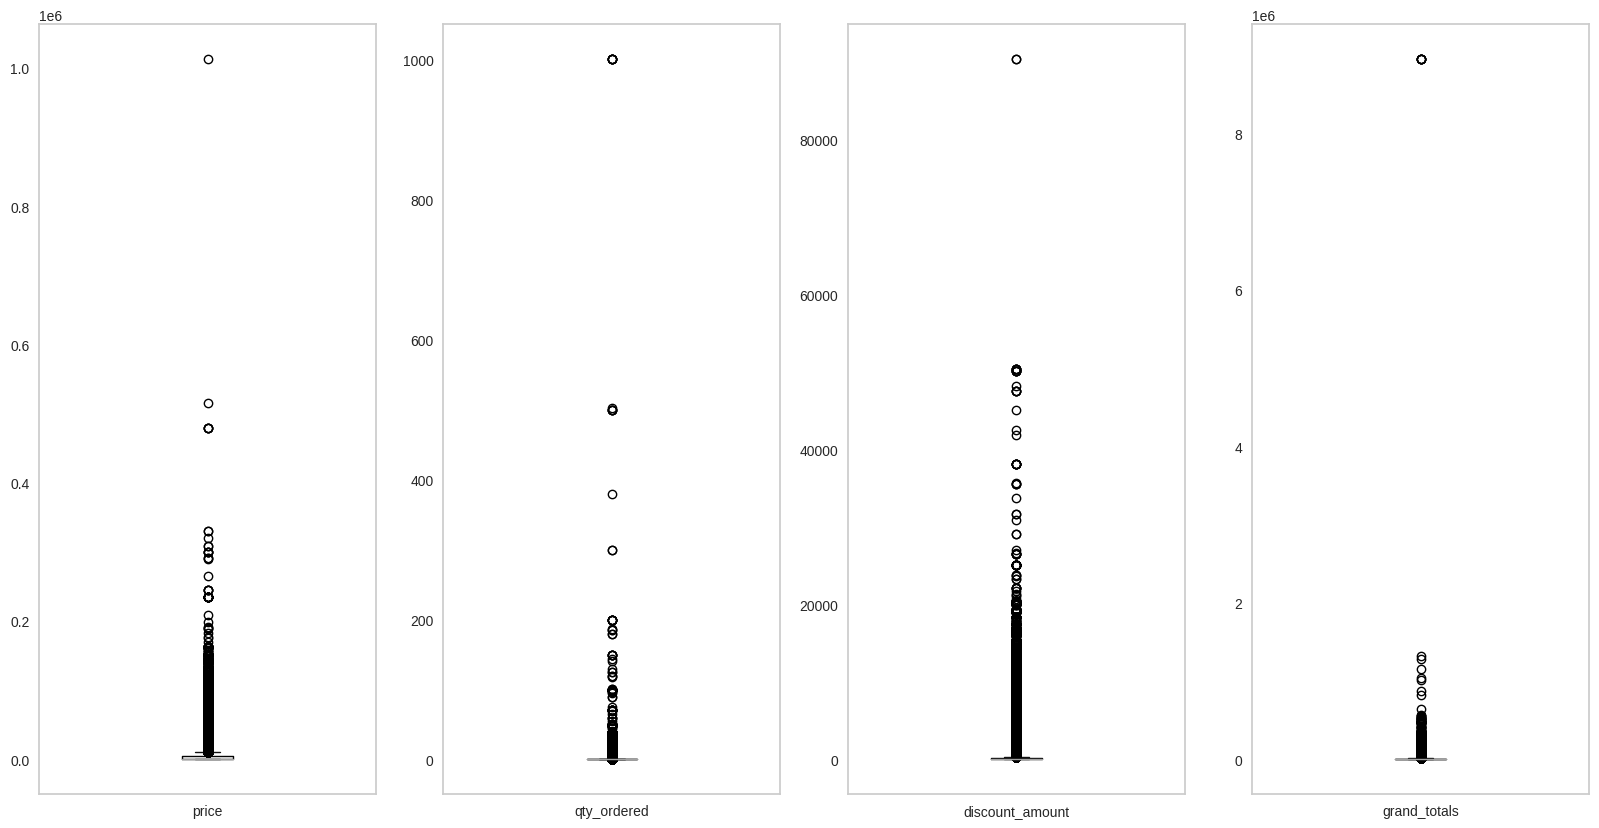

In [ ]:
#define all numerical column
numerical_column = ['price', 'qty_ordered',
                   'discount_amount', 'grand_totals']

#box plot
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,10))
for i,col in enumerate(numerical_column):
    a = df_outlier.boxplot(col, ax=axes.flatten()[i],grid=False)
plt.show()

##**Dropping Relevant Outliers**

In [ ]:
#drop outlier
df_outlier = df_outlier.loc[(df_outlier['price']<800000)]
df_outlier= df_outlier.loc[(df_outlier['qty_ordered']<800)]
df_outlier = df_outlier.loc[(df_outlier['grand_totals']<600000)]
df_outlier = df_outlier.loc[(df_outlier['discount_amount']<600000)]

In [ ]:
#final dataset
df_clean = df_outlier.copy()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572622 entries, 0 to 584523
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                572622 non-null  object        
 1   status                 572608 non-null  object        
 2   created_at             572622 non-null  datetime64[ns]
 3   sku                    572619 non-null  object        
 4   price                  572622 non-null  float64       
 5   qty_ordered            572622 non-null  float64       
 6   grand_total            572622 non-null  float64       
 7   increment_id           572622 non-null  float64       
 8   category_name_1        572460 non-null  object        
 9   sales_commission_code  444474 non-null  object        
 10  discount_amount        572622 non-null  float64       
 11  payment_method         572622 non-null  object        
 12  working_date           572622 non-null  obje

#**EXPLORATORY DATA ANALYSIS**

In [ ]:
df_clean['increment_id'].nunique()

407101

In [ ]:
#EDA
df_eda = df_clean.copy()
df_eda['month_year'] = pd.to_datetime(df_eda['created_at']).dt.to_period('m')
df_eda['quarter'] = pd.to_datetime(df_eda['created_at']).dt.to_period('Q')
f_complete = df_eda['status'].isin(['complete'])

AOV = df_eda.loc[f_complete].groupby(['month_year','quarter']).agg({
    'grand_totals':'sum',
    'qty_ordered':'sum'}).rename(columns={
        'grand_totals':'monthly_revenue',
        'qty_ordered':'monthly_qty'}).reset_index()

order = df_eda.groupby(['month_year']).agg({'item_id':'count'}).rename(columns={'item_id' : 'monthly_order'}).reset_index()



##Grouping Completed Transaction Per Month

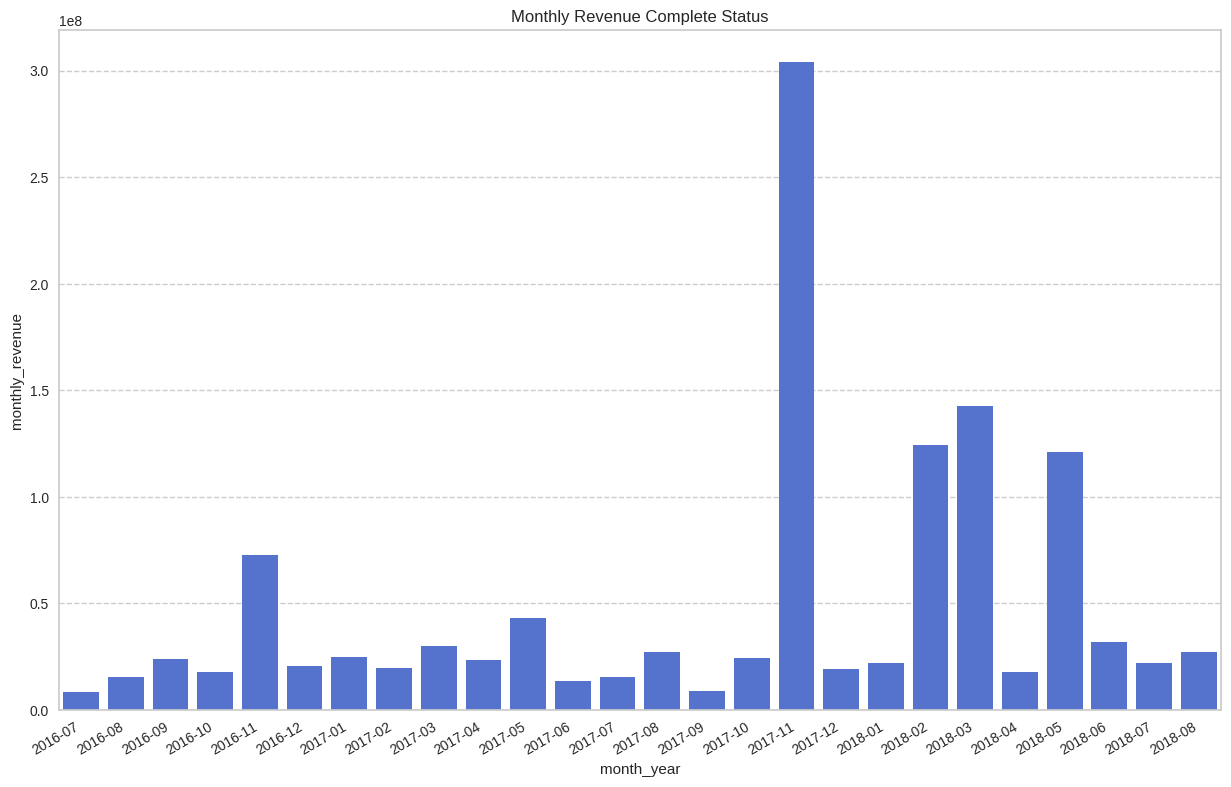

In [ ]:
#barchart of monthly revenue
plt.figure (figsize = (15,10))
sns.barplot(x='month_year', y='monthly_revenue', data= AOV, color = 'royalblue')
plt.title('Monthly Revenue Complete Status')
plt.gcf().autofmt_xdate()
plt.grid(axis='y', linestyle='--')
plt.show()

##Monthly Cancelled Transaction Amount

In [ ]:
status_eda = df_clean[df_clean['status'] == 'canceled']

In [ ]:
temp_df = status_eda.set_index(['created_at'])[['grand_totals']].resample('M').sum().reset_index()
temp_df['grand_totals'] = temp_df['grand_totals'] / 1000000
temp_df

,created_at,grand_totals
0,2016-07-31,24.336770
1,2016-08-31,26.594727
2,2016-09-30,52.227469
3,2016-10-31,58.050492
4,2016-11-30,138.858383
5,2016-12-31,54.029852
6,2017-01-31,74.196339
7,2017-02-28,49.286643
8,2017-03-31,74.964657
9,2017-04-30,91.402169


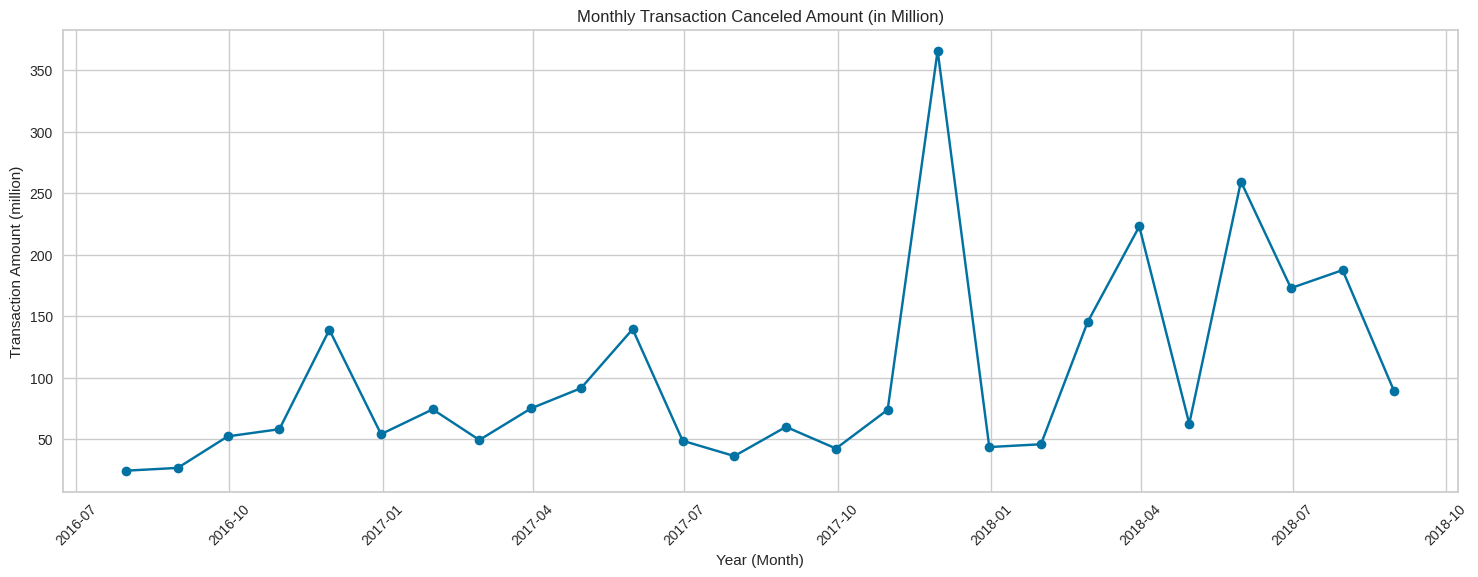

In [ ]:
# Creating Monthly Transaction Amount (in million)
plt.figure(figsize=(18, 6))
plt.plot(temp_df['created_at'], temp_df['grand_totals'], marker='o')
plt.xlabel('Year (Month)')
plt.ylabel('Transaction Amount (million)')
plt.title('Monthly Transaction Canceled Amount (in Million)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Significant increase is found on November 2017

##Looking for Most Cancelled Item Category

In [ ]:
#Cancelation Rate by Item Category

cancel_category = status_eda.groupby(['category_name_1']).agg({
    'grand_totals': 'sum',
})

cancel_category['grand_totals'] = cancel_category['grand_totals'] / 1000000

cancel_category.columns = ['Total_Cancel_by_Category']

cancel_category.reset_index()


,category_name_1,Total_Cancel_by_Category
0,Appliances,349.521522
1,Beauty & Grooming,16.730978
2,Books,0.414948
3,Computing,131.355894
4,Entertainment,291.382212
5,Health & Sports,9.193518
6,Home & Living,16.424645
7,Kids & Baby,5.724435
8,Men's Fashion,44.421125
9,Mobiles & Tablets,1571.295178


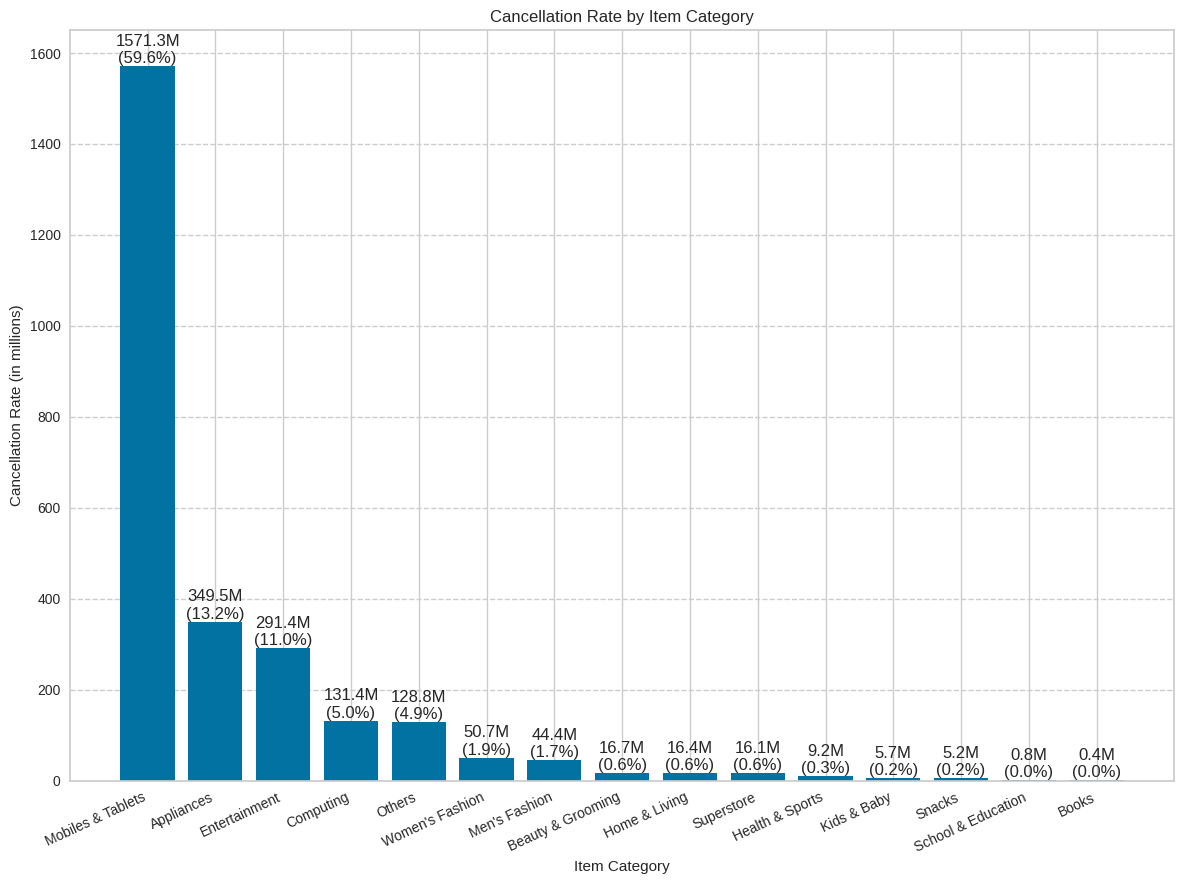

In [ ]:
# Sort the DataFrame in descending order based on cancellation rates
cancel_category.sort_values(by='Total_Cancel_by_Category', ascending=False, inplace=True)

# Create a bar chart
plt.figure(figsize=(12, 9))
bars = plt.bar(cancel_category.index, cancel_category['Total_Cancel_by_Category'])

# Calculate the total amount of cancellations
total_cancellations = cancel_category['Total_Cancel_by_Category'].sum()

# Add labels and title
plt.xlabel('Item Category')
plt.ylabel('Cancellation Rate (in millions)')
plt.title('Cancellation Rate by Item Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=25, ha='right')

# Add labels to the bars
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_cancellations) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}M\n({percentage:.1f}%)', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--')

# Display the bar chart
plt.tight_layout()
plt.show()

Most cancelled item category ;

- Mobiles & Tablets
- Appliances
- Entertainment
- Computing
- Others

##Looking for Most Used Payment Method in Cancelled Transaction

In [ ]:
#Cancellation Rate by payment method

cancel_payment = status_eda.groupby(['payment_method']).agg({
    'grand_totals': 'sum',
})

cancel_payment['grand_totals'] = cancel_payment['grand_totals'] / 1000000

cancel_payment.columns = ['Total_Cancel_by_Payment_Method']

cancel_payment.reset_index()

,payment_method,Total_Cancel_by_Payment_Method
0,apg,17.211451
1,bank_transfer,472.628006
2,cod,394.714952
3,customercredit,7.139635
4,e_wallet,1720.638066
5,financesettlement,0.195793
6,marketingexpense,0.001330
7,mygateway,9.832030
8,productcredit,0.039537
9,ublcreditcard,15.828562


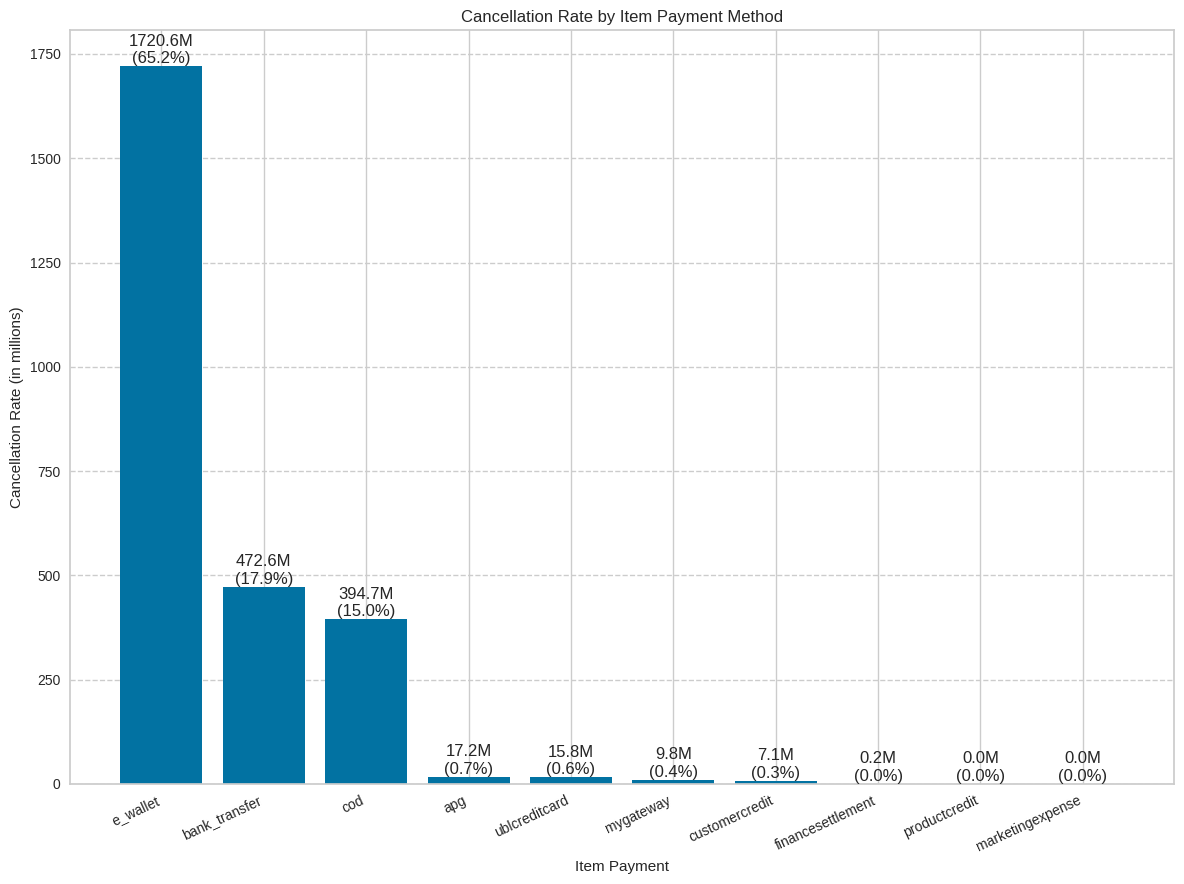

In [ ]:
# Sort the DataFrame in descending order based on cancellation rates
cancel_payment.sort_values(by='Total_Cancel_by_Payment_Method', ascending=False, inplace=True)

# Create a bar chart
plt.figure(figsize=(12, 9))
bars2 = plt.bar(cancel_payment.index, cancel_payment['Total_Cancel_by_Payment_Method'])

# Add labels and title
plt.xlabel('Item Payment')
plt.ylabel('Cancellation Rate (in millions)')
plt.title('Cancellation Rate by Item Payment Method')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=25, ha='right')

# Add labels to the bars
for bar in bars2:
    height = bar.get_height()
    percentage = (height / total_cancellations) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}M\n({percentage:.1f}%)', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--')
# Display the bar chart
plt.tight_layout()
plt.show()

Most used payment method for cancelled transaction ;
- E-Wallet
- Bank transfer
- COD
- APG
- UBLCreditcard

In [ ]:
#Total Cancellation Amount by Quarter

df_eda['month_year'] = pd.to_datetime(df_eda['created_at']).dt.to_period('m')
df_eda['quarter'] = pd.to_datetime(df_eda['created_at']).dt.to_period('Q')
f_cancel = df_eda['status'].isin(['canceled'])

AOV_cancel = df_eda.loc[f_cancel].groupby(['quarter']).agg({
    'grand_totals':'sum',
    'qty_ordered':'sum'}).reset_index()

AOV_cancel['grand_totals'] = AOV_cancel['grand_totals'] / 1000000

AOV_cancel

,quarter,grand_totals,qty_ordered
0,2016Q3,103.158966,16181.0
1,2016Q4,250.938726,47320.0
2,2017Q1,198.447639,20495.0
3,2017Q2,279.468385,45795.0
4,2017Q3,138.507452,28191.0
5,2017Q4,483.141134,64208.0
6,2018Q1,413.814015,73990.0
7,2018Q2,494.628244,40006.0
8,2018Q3,276.124801,15011.0


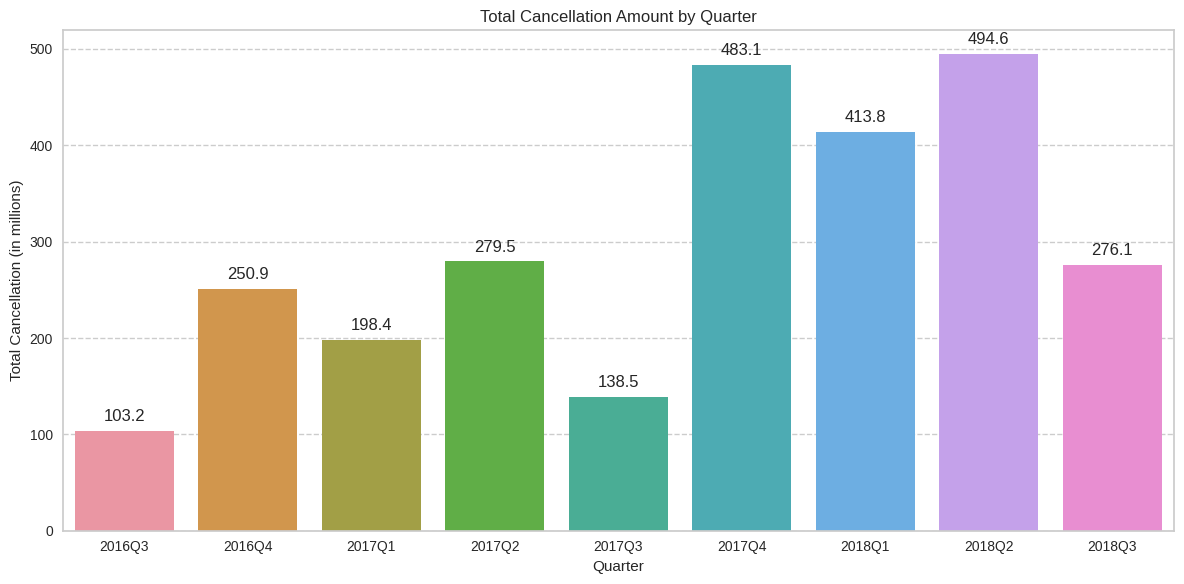

In [ ]:
# Create the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=AOV_cancel, x='quarter', y='grand_totals')

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Total Cancellation (in millions)')
plt.title('Total Cancellation Amount by Quarter')

# Add labels to the bars
for index, value in enumerate(AOV_cancel['grand_totals']):
    plt.annotate(f'{value:.1f}', xy=(index, value), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--')

# Display the bar chart
plt.tight_layout()
plt.show()

In [ ]:
#Total Complete Amount by Quarter

df_eda['month_year'] = pd.to_datetime(df_eda['created_at']).dt.to_period('m')
df_eda['quarter'] = pd.to_datetime(df_eda['created_at']).dt.to_period('Q')
f_Complete = df_eda['status'].isin(['complete'])

AOV_Complete = df_eda.loc[f_Complete].groupby(['quarter']).agg({
    'grand_totals':'sum',
    'qty_ordered':'sum'}).reset_index()

AOV_Complete['grand_totals'] = AOV_Complete['grand_totals'] / 1000000

AOV_Complete

,quarter,grand_totals,qty_ordered
0,2016Q3,47.660513,24288.0
1,2016Q4,110.632557,60523.0
2,2017Q1,74.501807,32942.0
3,2017Q2,80.613344,51813.0
4,2017Q3,52.008651,38557.0
5,2017Q4,347.374789,71996.0
6,2018Q1,289.143316,57082.0
7,2018Q2,171.091733,32286.0
8,2018Q3,49.299757,13267.0


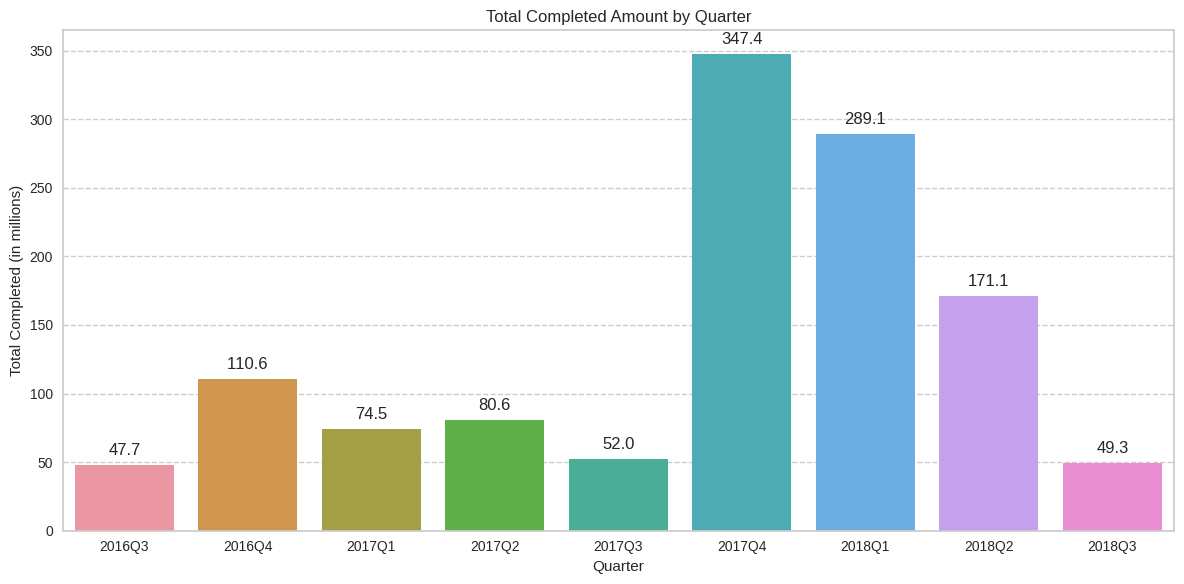

In [ ]:
# Create the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=AOV_Complete, x='quarter', y='grand_totals')

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Total Completed (in millions)')
plt.title('Total Completed Amount by Quarter')

# Add labels to the bars
for index, value in enumerate(AOV_Complete['grand_totals']):
    plt.annotate(f'{value:.1f}', xy=(index, value), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--')

# Display the bar chart
plt.tight_layout()
plt.show()

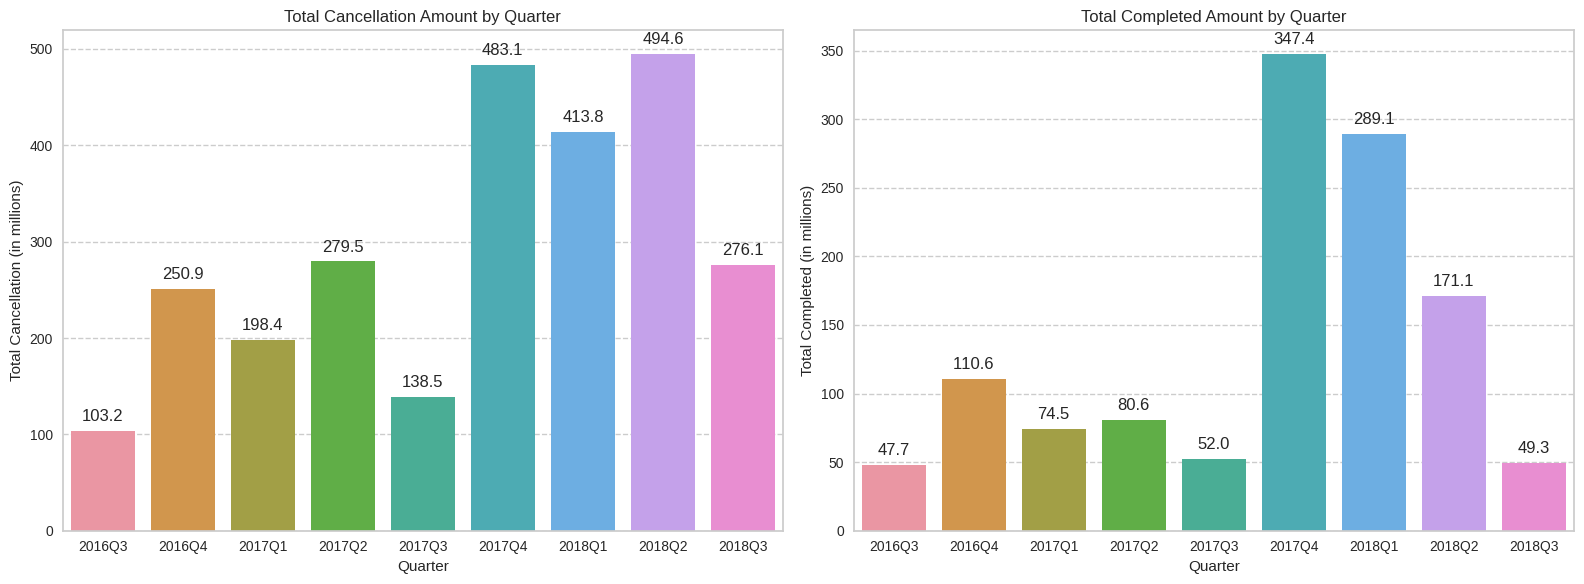

In [ ]:

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# First subplot - Total Cancellation
sns.barplot(data=AOV_cancel, x='quarter', y='grand_totals', ax=axes[0])
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Total Cancellation (in millions)')
axes[0].set_title('Total Cancellation Amount by Quarter')
for index, value in enumerate(AOV_cancel['grand_totals']):
    axes[0].annotate(f'{value:.1f}', xy=(index, value), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
axes[0].grid(axis='y', linestyle='--')

# Second subplot - Total Completed
sns.barplot(data=AOV_Complete, x='quarter', y='grand_totals', ax=axes[1])
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Total Completed (in millions)')
axes[1].set_title('Total Completed Amount by Quarter')
for index, value in enumerate(AOV_Complete['grand_totals']):
    axes[1].annotate(f'{value:.1f}', xy=(index, value), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
axes[1].grid(axis='y', linestyle='--')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

In [ ]:
# Total Cancellation Amount by Quarter
df_eda['month_year'] = pd.to_datetime(df_eda['created_at']).dt.to_period('m')
df_eda['quarter'] = pd.to_datetime(df_eda['created_at']).dt.to_period('Q')
f_stat = df_eda['status'].isin(['canceled', 'complete'])

AOV_stat = df_eda.loc[f_stat].groupby(['quarter', 'status']).agg({

    'grand_totals':'sum',


    }).reset_index()

AOV_stat['grand_totals'] = AOV_stat['grand_totals'] / 1000000

AOV_stat

,quarter,status,grand_totals
0,2016Q3,canceled,103.158966
1,2016Q3,complete,47.660513
2,2016Q4,canceled,250.938726
3,2016Q4,complete,110.632557
4,2017Q1,canceled,198.447639
5,2017Q1,complete,74.501807
6,2017Q2,canceled,279.468385
7,2017Q2,complete,80.613344
8,2017Q3,canceled,138.507452
9,2017Q3,complete,52.008651


##Completed & Cancelled Transaction Comparison

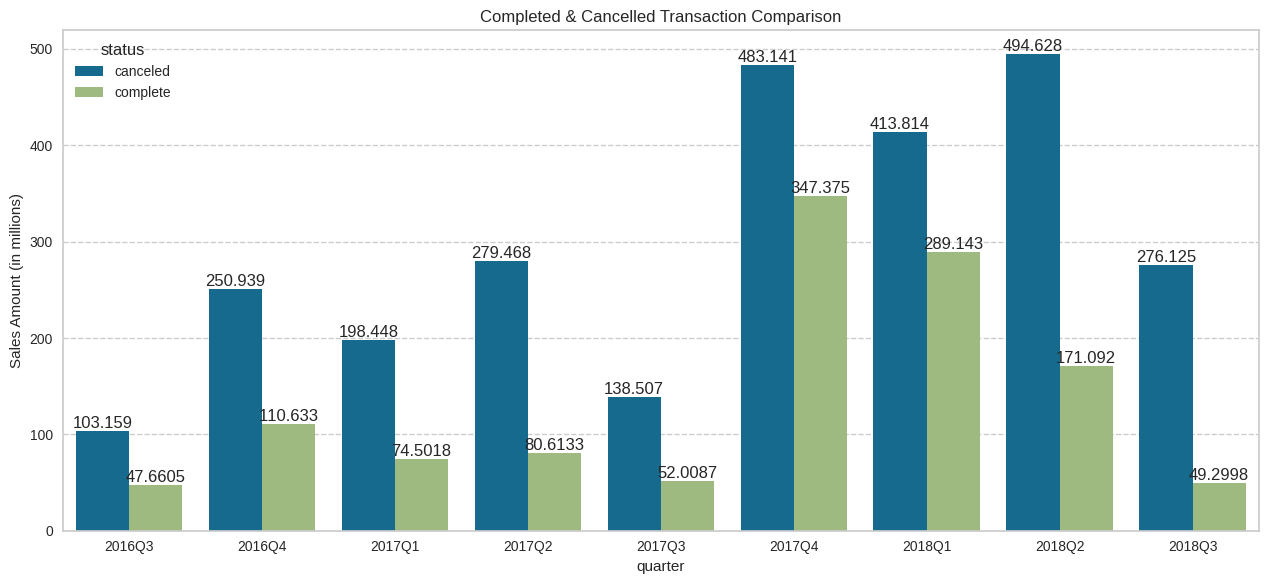

In [ ]:
plt.figure(figsize=(25, 6))

# First subplot
ax = plt.subplot(1, 2, 1)
sns.barplot(x='quarter', y='grand_totals', hue='status', data=AOV_stat)
plt.title('Completed & Cancelled Transaction Comparison')
plt.xlabel('quarter')
plt.ylabel('Sales Amount (in millions)')
plt.legend(title='status', loc='upper left')
# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

From the chart above it is concluded that cancelled transaction amount is alarmingly high.

Cancelled transaction consistently totalled higher than completed transaction amount.

In [ ]:
# Total Increment ID by Status Quarter

f_stat = df_eda['status'].isin(['canceled', 'complete'])

stat_increment = df_eda.loc[f_stat].groupby(['quarter', 'status']).agg({

    'increment_id':'nunique',

    }).reset_index()


stat_increment

,quarter,status,increment_id
0,2016Q3,canceled,11896
1,2016Q3,complete,18432
2,2016Q4,canceled,33718
3,2016Q4,complete,43530
4,2017Q1,canceled,14042
5,2017Q1,complete,18308
6,2017Q2,canceled,23578
7,2017Q2,complete,19984
8,2017Q3,canceled,14249
9,2017Q3,complete,15266


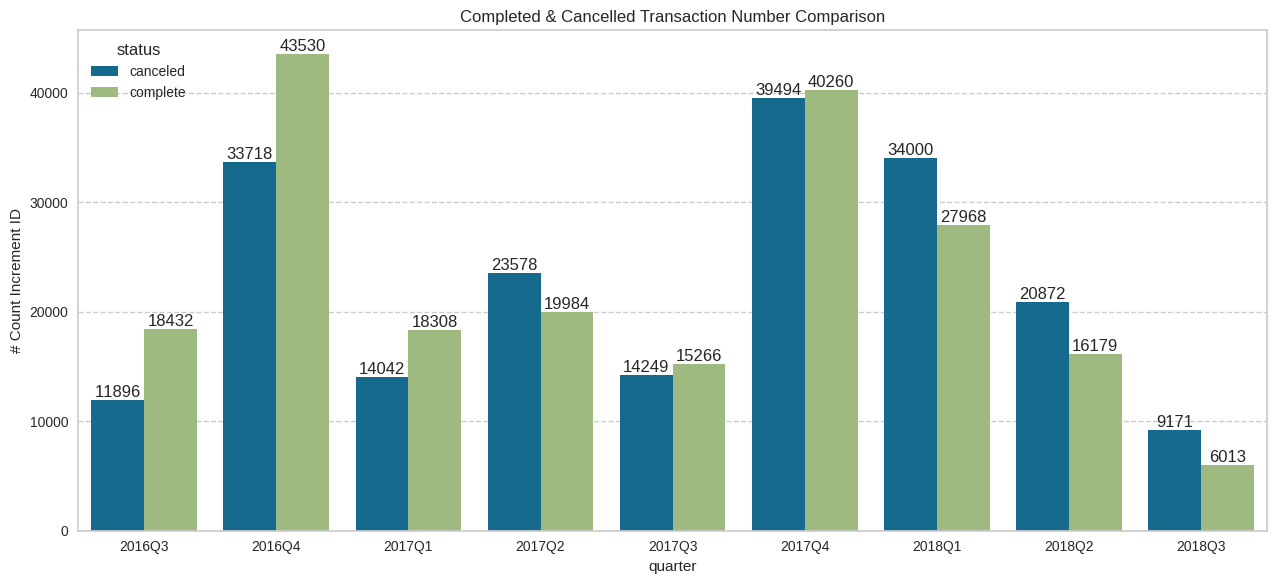

In [ ]:
plt.figure(figsize=(25, 6))

# First subplot
ax = plt.subplot(1, 2, 1)
sns.barplot(x='quarter', y='increment_id', hue='status', data=stat_increment)
plt.title('Completed & Cancelled Transaction Number Comparison')
plt.xlabel('quarter')
plt.ylabel('# Count Increment ID')
plt.legend(title='status', loc='upper left')

# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
column_name = 'increment_id'
total_count = df_clean['increment_id'].count()

print(total_count)

572622


##Item Category Sales Performance

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572622 entries, 0 to 584523
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                572622 non-null  object        
 1   status                 572608 non-null  object        
 2   created_at             572622 non-null  datetime64[ns]
 3   sku                    572619 non-null  object        
 4   price                  572622 non-null  float64       
 5   qty_ordered            572622 non-null  float64       
 6   grand_total            572622 non-null  float64       
 7   increment_id           572622 non-null  float64       
 8   category_name_1        572460 non-null  object        
 9   sales_commission_code  444474 non-null  object        
 10  discount_amount        572622 non-null  float64       
 11  payment_method         572622 non-null  object        
 12  working_date           572622 non-null  obje

In [ ]:
condition_column = 'status'
desired_condition = 'cancelled'
cancelled_filtered = df_eda[condition_column] == desired_condition

count_column = 'increment_id'
value_counts = df_eda[cancelled_filtered][count_column].value_counts()

print(value_counts)

Series([], Name: increment_id, dtype: int64)


In [ ]:
#category Transaction User ID

f_completed = df_eda['status'].isin(['complete'])
f_completed = df_eda['category_name_1'].isin(['Mobiles & Tablets', 'Appliances', 'Entertainment', 'Computing'])

Cat_completed = df_eda.loc[f_completed].groupby(['quarter', 'category_name_1']).agg({
    'increment_id':'nunique',
    'grand_totals':'sum',

    }).reset_index()

Cat_completed['grand_totals'] = Cat_completed['grand_totals'] / 1000000

Cat_completed['avg_trans_(rb)'] = Cat_completed['grand_totals'] / Cat_completed['increment_id'] * 1000

Cat_completed.round(2)

,quarter,category_name_1,increment_id,grand_totals,avg_trans_(rb)
0,2016Q3,Appliances,1822,22.84,12.53
1,2016Q3,Computing,869,8.45,9.73
2,2016Q3,Entertainment,989,14.61,14.77
3,2016Q3,Mobiles & Tablets,5626,73.33,13.03
4,2016Q4,Appliances,7147,55.17,7.72
5,2016Q4,Computing,3039,24.82,8.17
6,2016Q4,Entertainment,2435,48.26,19.82
7,2016Q4,Mobiles & Tablets,15179,155.84,10.27
8,2017Q1,Appliances,2252,23.75,10.55
9,2017Q1,Computing,856,7.31,8.54


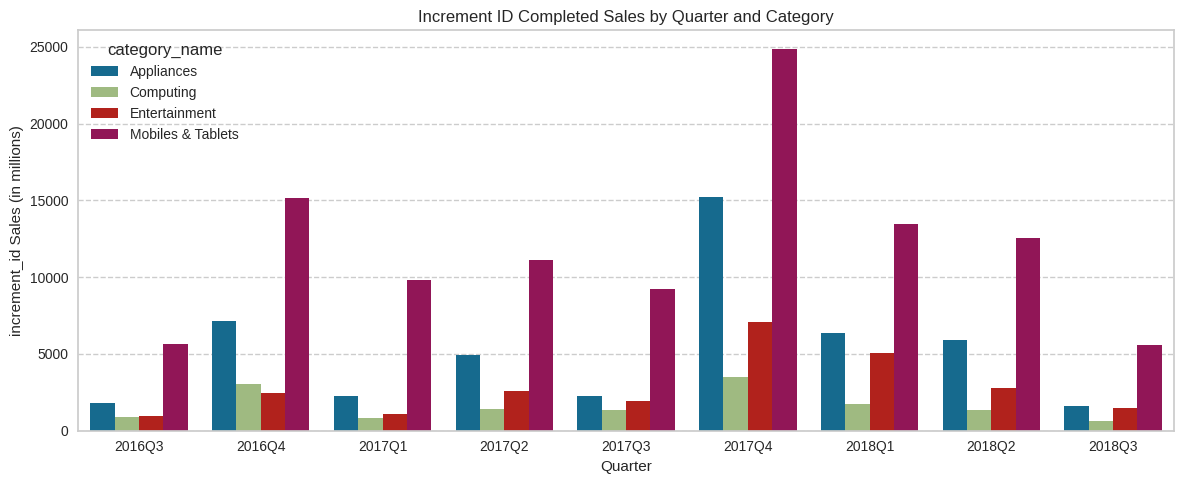

In [ ]:
# Create the bar plot using Seaborn's catplot
plt.figure(figsize=(12, 5))
sns.barplot(x='quarter', y='increment_id', hue='category_name_1', data=Cat_completed)

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('increment_id Sales (in millions)')
plt.title('Increment ID Completed Sales by Quarter and Category')
plt.legend(title='category_name', loc='upper left')

plt.grid(axis='y', linestyle='--')

# Display the bar plot
plt.tight_layout()
plt.show()

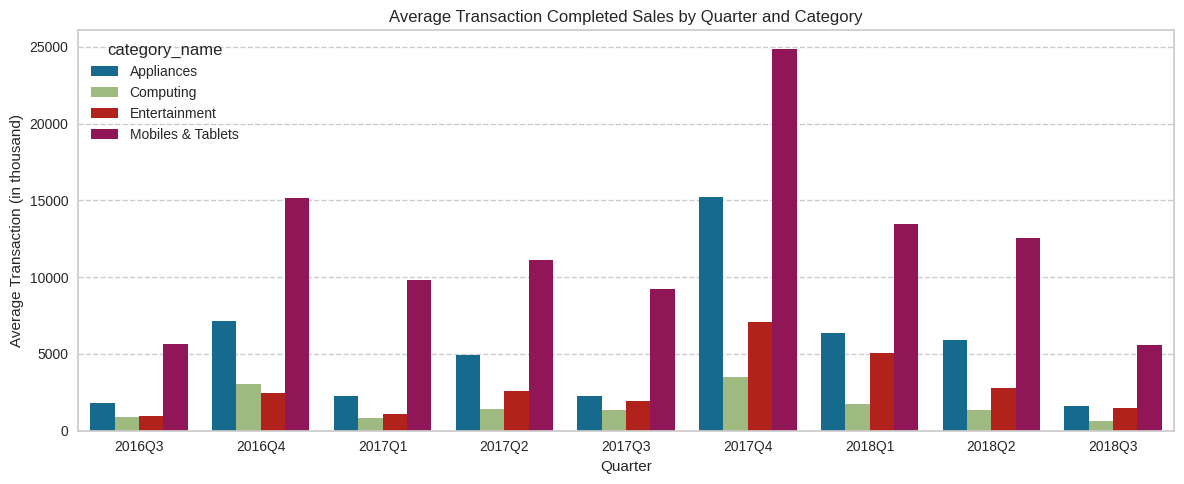

In [ ]:
# Create the bar plot using Seaborn's catplot
plt.figure(figsize=(12, 5))
sns.barplot(x='quarter', y='increment_id', hue='category_name_1', data=Cat_completed)


# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Average Transaction (in thousand)')
plt.title('Average Transaction Completed Sales by Quarter and Category')
plt.legend(title='category_name', loc='upper left')

plt.grid(axis='y', linestyle='--')

# Display the bar plot
plt.tight_layout()
plt.show()

In [ ]:
#item group revenue contribution for each quarter

df_eda['month_year'] = pd.to_datetime(df_eda['created_at']).dt.to_period('m')
df_eda['quarter'] = pd.to_datetime(df_eda['created_at']).dt.to_period('Q')
f_completed = df_eda['status'].isin(['complete'])

f_completed = df_eda['category_name_1'].isin(['Mobiles & Tablets', 'Appliances', 'Entertainment', 'Computing', 'Others'])

AOV_completed = df_eda.loc[f_completed].groupby(['quarter','category_name_1']).agg({
    'grand_totals':'sum',
    }).reset_index()

AOV_completed['grand_totals'] = AOV_completed['grand_totals'] / 1000000

AOV_completed

,quarter,category_name_1,grand_totals
0,2016Q3,Appliances,22.836724
1,2016Q3,Computing,8.451736
2,2016Q3,Entertainment,14.605366
3,2016Q3,Mobiles & Tablets,73.326040
4,2016Q3,Others,11.956983
5,2016Q4,Appliances,55.170143
6,2016Q4,Computing,24.824782
7,2016Q4,Entertainment,48.256684
8,2016Q4,Mobiles & Tablets,155.838733
9,2016Q4,Others,19.017137


###Highest Performing Item Category

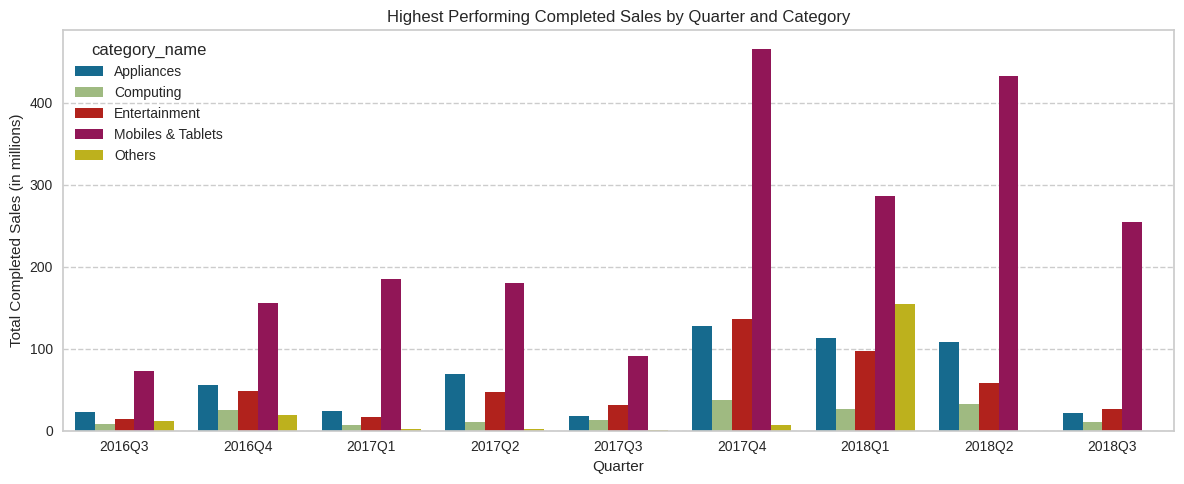

In [ ]:
#item group revenue contribution for each quarter

# Create the bar plot using Seaborn's catplot
plt.figure(figsize=(12, 5))
#plot = sns.catplot(data=AOV_completed, x='quarter', y='grand_totals', hue='category_name_1', kind='bar', height=6, aspect=2, legend_out=True )
sns.barplot(x='quarter', y='grand_totals', hue='category_name_1', data=AOV_completed)

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Total Completed Sales (in millions)')
plt.title('Highest Performing Completed Sales by Quarter and Category')
plt.legend(title='category_name', loc='upper left')

plt.grid(axis='y', linestyle='--')

# Display the bar plot
plt.tight_layout()
plt.show()

Best performing item categories;
- Mobiles & Tablets
- Appliances
- Entertainment
- Computing
- Others

Throughout the years, Mobiles & Tablets category consistently totalled higher in transaction amount compared to other top 5 category.

Amount difference between Mobiles & Tablets compared to other category is quite significant, this condition should alarm management due to high sales dependency to 1 item category.

In [ ]:
#item group revenue contribution for each quarter

df_eda['month_year'] = pd.to_datetime(df_eda['created_at']).dt.to_period('m')
df_eda['quarter'] = pd.to_datetime(df_eda['created_at']).dt.to_period('Q')
f_completed = df_eda['status'].isin(['complete'])

f_completed_low = df_eda['category_name_1'].isin(['Books', 'School & Education', 'Snacks', 'Kids & Baby', 'Health & Sports'])

AOV_completed_low = df_eda.loc[f_completed_low].groupby(['quarter','category_name_1']).agg({
    'grand_totals':'sum',
    }).reset_index()

AOV_completed_low['grand_totals'] = AOV_completed_low['grand_totals'] / 1000000

AOV_completed_low

,quarter,category_name_1,grand_totals
0,2016Q3,Books,0.297646
1,2016Q3,Health & Sports,1.340412
2,2016Q3,Kids & Baby,0.855186
3,2016Q3,School & Education,0.327702
4,2016Q3,Snacks,1.697116
5,2016Q4,Books,0.144943
6,2016Q4,Health & Sports,3.567349
7,2016Q4,Kids & Baby,1.617396
8,2016Q4,School & Education,0.252159
9,2016Q4,Snacks,3.705946


###Lowest Performing Item Category

<Figure size 1200x900 with 0 Axes>

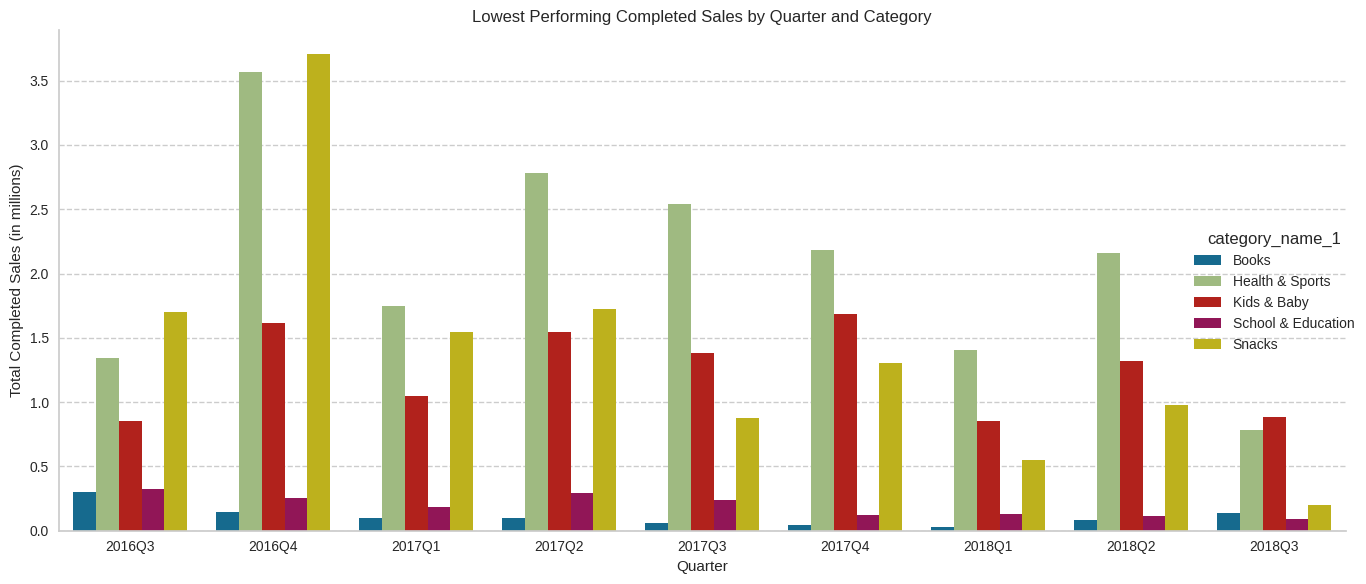

In [ ]:
#item group revenue contribution for each quarter

# Create the bar plot using Seaborn's catplot
plt.figure(figsize=(12, 9))
plot = sns.catplot(data=AOV_completed_low, x='quarter', y='grand_totals', hue='category_name_1', kind='bar', height=6, aspect=2, legend_out=True )

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Total Completed Sales (in millions)')
plt.title('Lowest Performing Completed Sales by Quarter and Category')

plt.grid(axis='y', linestyle='--')

# Display the bar plot
plt.tight_layout()
plt.show()

##**User Transaction Pattern**

###Average User Transaction Amount (Completed)

In [ ]:
#Average Transaction User ID
df_eda['month_year'] = pd.to_datetime(df_eda['created_at']).dt.to_period('m')
df_eda['quarter'] = pd.to_datetime(df_eda['created_at']).dt.to_period('Q')
f_completed = df_eda['status'].isin(['complete'])

ATU_completed = df_eda.loc[f_completed].groupby(['quarter']).agg({
    'customer_id':'nunique',
    'grand_totals':'mean',

    }).reset_index()

#ATU_completed['grand_totals'] = ATU_completed['grand_totals'] / 1000000

ATU_completed

,quarter,customer_id,grand_totals
0,2016Q3,7171,2192.195088
1,2016Q4,16841,1977.064165
2,2017Q1,10195,2740.548340
3,2017Q2,11333,2026.835893
4,2017Q3,9626,1702.243683
5,2017Q4,19647,5610.511014
6,2018Q1,15089,7952.017723
7,2018Q2,8675,6889.969933
8,2018Q3,3731,5022.899311


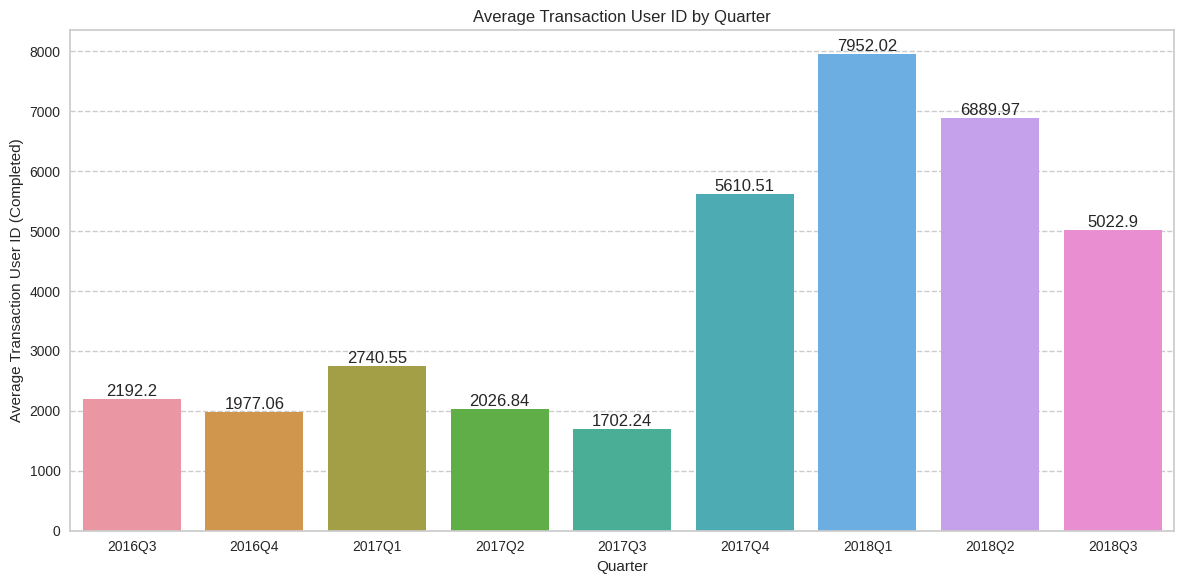

In [ ]:
# Create the bar chart using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ATU_completed, x='quarter', y='grand_totals')

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Average Transaction User ID (Completed)')
plt.title('Average Transaction User ID by Quarter')

plt.grid(axis='y', linestyle='--')

# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

# Display the bar chart
plt.tight_layout()
plt.show()

###Average User Transaction Amount (Cancelled)

In [ ]:
#Average Transaction User ID

df_eda['month_year'] = pd.to_datetime(df_eda['created_at']).dt.to_period('m')
df_eda['quarter'] = pd.to_datetime(df_eda['created_at']).dt.to_period('Q')
f_canceled = df_eda['status'].isin(['canceled'])

ATU_canceled = df_eda.loc[f_canceled].groupby(['quarter']).agg({
    'customer_id':'nunique',
    'grand_totals':'mean',

    }).reset_index()

#ATU_canceled['grand_totals'] = ATU_completed['grand_totals'] / 1000000

ATU_canceled

,quarter,customer_id,grand_totals
0,2016Q3,5055,7351.693711
1,2016Q4,11820,5965.641082
2,2017Q1,5516,11461.686426
3,2017Q2,10211,7770.133314
4,2017Q3,6856,6259.375104
5,2017Q4,16730,8823.045236
6,2018Q1,14871,10426.941178
7,2018Q2,8004,18759.367532
8,2018Q3,3454,23041.121558


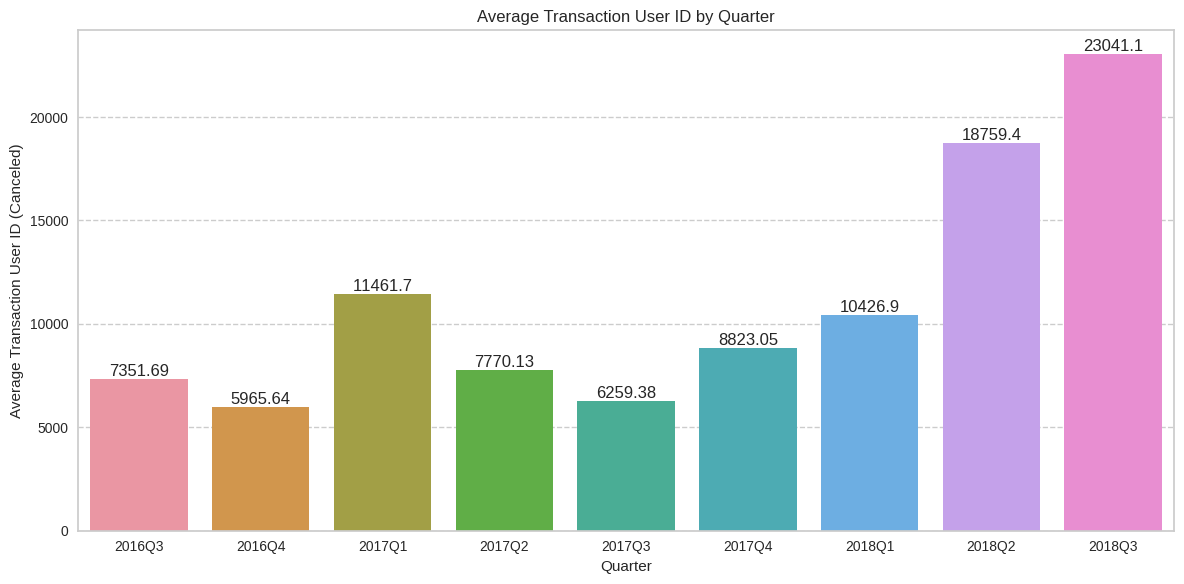

In [ ]:
# Create the bar chart using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ATU_canceled, x='quarter', y='grand_totals')

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Average Transaction User ID (Canceled)')
plt.title('Average Transaction User ID by Quarter')

plt.grid(axis='y', linestyle='--')

# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

# Display the bar chart
plt.tight_layout()
plt.show()

###User ID Number with Completed Transaction

In [ ]:

#Total User ID by Status Complete

ATU_completed['customer_id'].sum()

102308

###User ID number with Cancelled Transaction

In [ ]:
#Total User ID by Status Canceled

ATU_canceled['customer_id'].sum()

82517

#**COHORT ANALYSIS**

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572622 entries, 0 to 584523
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                572622 non-null  object        
 1   status                 572608 non-null  object        
 2   created_at             572622 non-null  datetime64[ns]
 3   sku                    572619 non-null  object        
 4   price                  572622 non-null  float64       
 5   qty_ordered            572622 non-null  float64       
 6   grand_total            572622 non-null  float64       
 7   increment_id           572622 non-null  float64       
 8   category_name_1        572460 non-null  object        
 9   sales_commission_code  444474 non-null  object        
 10  discount_amount        572622 non-null  float64       
 11  payment_method         572622 non-null  object        
 12  working_date           572622 non-null  obje

In [ ]:
df_eda['cohort'] = df_eda.groupby('customer_id')['created_at'] \
                .transform('min') \
                .dt.to_period('Q')

## Create Cohort Quarter (Completed)

### Create Cohort DataFrame

In [ ]:
#create cohort df
from operator import attrgetter

df_eda2 = df_eda[df_eda['status'] == 'complete']

df_cohort = df_eda2.groupby(['cohort', 'quarter']) \
            .agg(n_customers=('customer_id', 'nunique')) \
            .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.quarter - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,quarter,n_customers,period_number
0,2016Q3,2016Q3,7171,0
1,2016Q3,2016Q4,2283,1
2,2016Q3,2017Q1,1211,2
3,2016Q3,2017Q2,1153,3
4,2016Q3,2017Q3,782,4
5,2016Q3,2017Q4,851,5
6,2016Q3,2018Q1,464,6
7,2016Q3,2018Q2,396,7
8,2016Q3,2018Q3,232,8
9,2016Q4,2016Q4,14558,0


### Pivoting Cohort DataFrame

In [ ]:
#pivoting the df
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                    columns = 'period_number',
                                    values = 'n_customers')

In [ ]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8
cohort,,,,,,,,,
2016Q3,7171.0,2283.0,1211.0,1153.0,782.0,851.0,464.0,396.0,232.0
2016Q4,14558.0,1835.0,1501.0,960.0,1312.0,591.0,491.0,211.0,NaN
2017Q1,7149.0,858.0,442.0,461.0,265.0,215.0,106.0,NaN,NaN
2017Q2,7821.0,1293.0,973.0,474.0,417.0,159.0,NaN,NaN,NaN
2017Q3,6149.0,937.0,395.0,308.0,161.0,NaN,NaN,NaN,NaN
2017Q4,15113.0,1456.0,859.0,330.0,NaN,NaN,NaN,NaN,NaN
2018Q1,11444.0,866.0,247.0,NaN,NaN,NaN,NaN,NaN,NaN
2018Q2,5123.0,357.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018Q3,1928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#create cohort size
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

### Cohort Chart Quarter

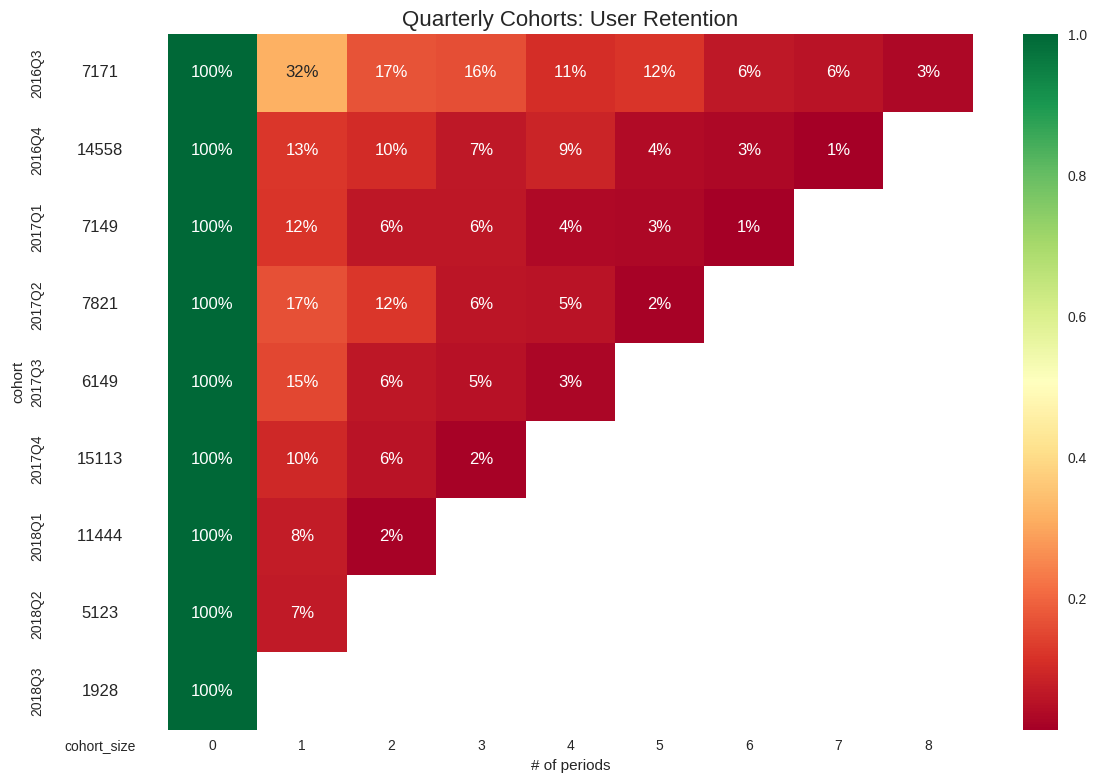

In [ ]:
#cohort chart
import matplotlib.colors as mcolors

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Quarterly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

Insight :


*   List item
*   List item



##Create Cohort Monthly (Completed)

###Create Cohort DataFrame

In [ ]:
df_eda['cohort_month'] = df_eda.groupby('customer_id')['created_at'] \
                .transform('min') \
                .dt.to_period('M')

df_eda2 = df_eda[df_eda['status'] == 'complete']

df_cohort_month = df_eda2.groupby(['cohort_month', 'month_year']) \
            .agg(n_customers=('customer_id', 'nunique')) \
            .reset_index(drop=False)
df_cohort_month['period_number'] = (df_cohort_month.month_year - df_cohort_month.cohort_month).apply(attrgetter('n'))
df_cohort_month

,cohort_month,month_year,n_customers,period_number
0,2016-07,2016-07,1622,0
1,2016-07,2016-08,384,1
2,2016-07,2016-09,314,2
3,2016-07,2016-10,260,3
4,2016-07,2016-11,403,4
...,...,...,...,...
346,2018-06,2018-07,99,1
347,2018-06,2018-08,41,2
348,2018-07,2018-07,928,0
349,2018-07,2018-08,67,1


###Pivoting the cohort df

In [ ]:
#pivoting the df
cohort_pivot_month = df_cohort_month.pivot_table(index = 'cohort_month',
                                    columns = 'period_number',
                                    values = 'n_customers')

In [ ]:
#create cohort size
cohort_size_month = cohort_pivot_month.iloc[:,0]
retention_matrix_month = cohort_pivot_month.divide(cohort_size_month, axis = 0)

###Cohort Chart Monthly

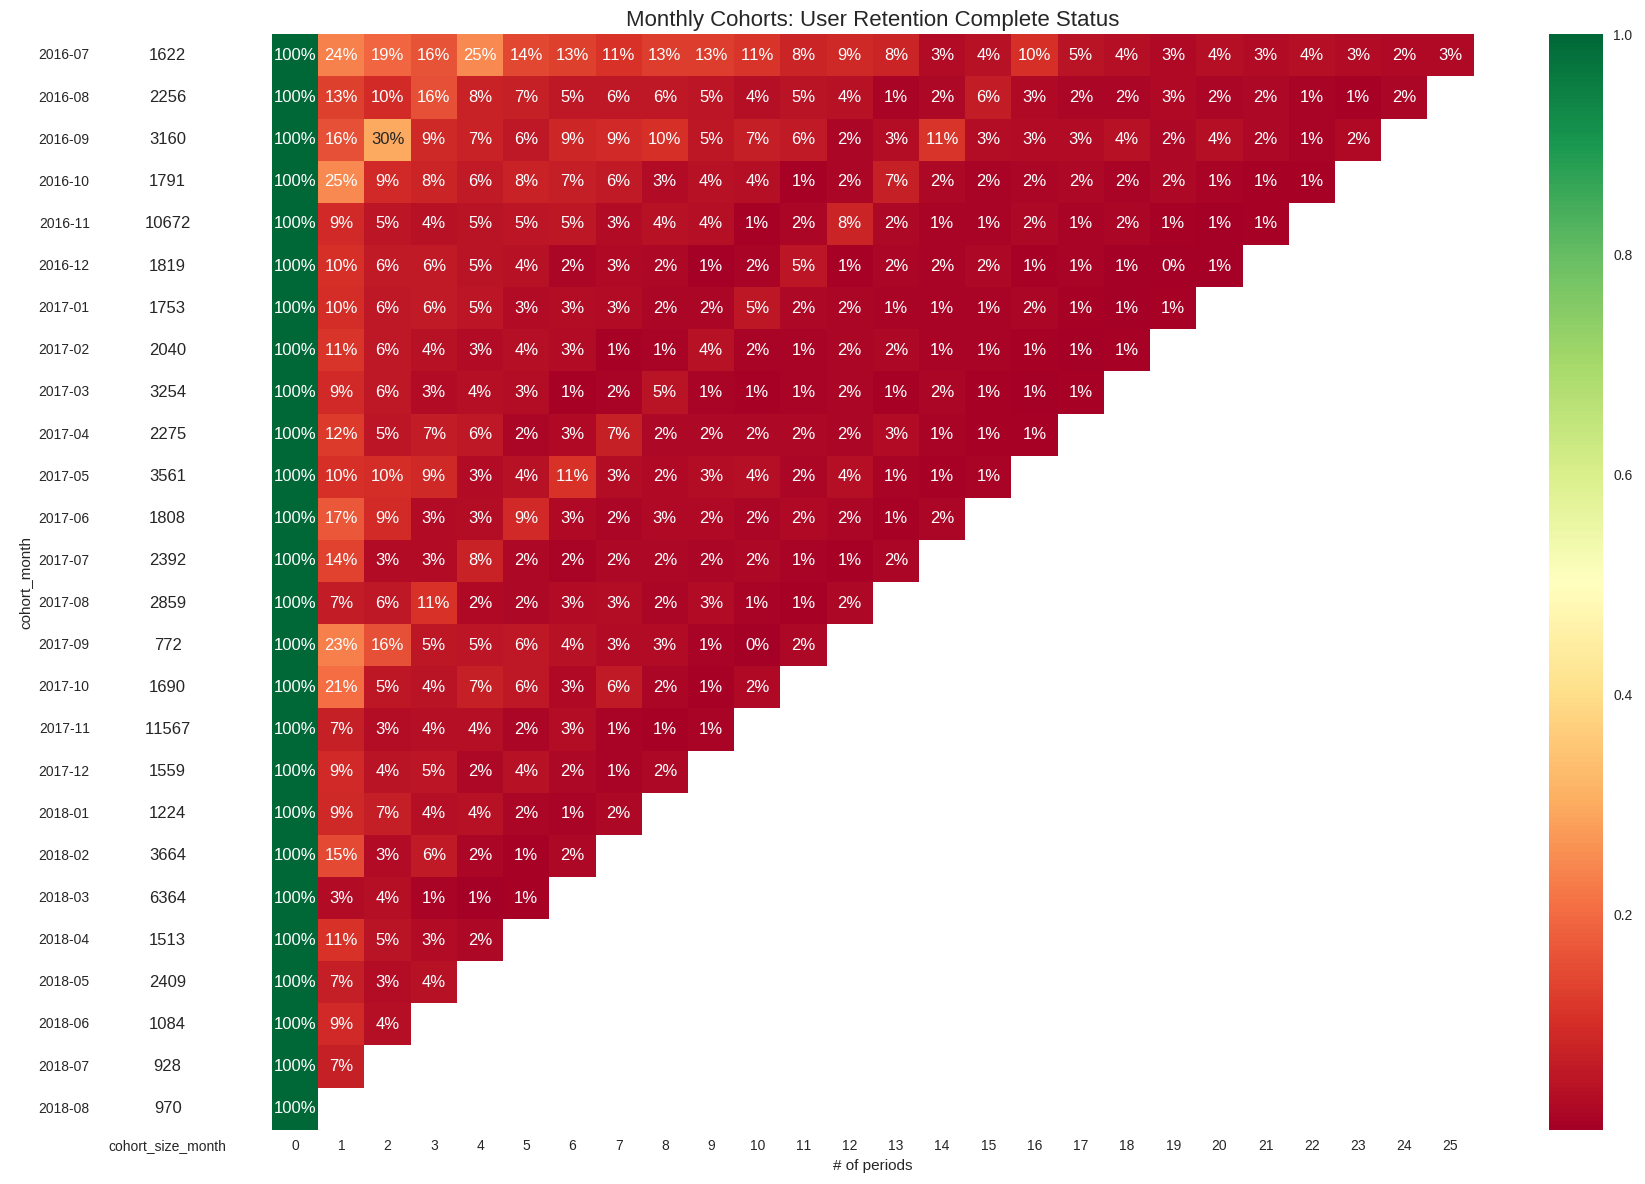

In [ ]:
#Monthly Cohort Analysist

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(18, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix_month,
                mask=retention_matrix_month.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention Complete Status', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df_month = pd.DataFrame(cohort_size_month).rename(columns={0: 'cohort_size_month'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df_month,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

From the Cohort analysis above, there is slight increase every November.
Black Friday may be the external factor from this pattern.

#**CLUSTERING ANALYSIS**

## Import Library

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import cluster
from datetime import datetime
from datetime import timedelta
import plotly.express as px
from pandas.plotting import scatter_matrix
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Pre-Processing

In [ ]:
# We Group the data to see unique user characteristics
customer = df_eda.groupby('customer_id').agg({
    'increment_id': 'nunique',
    'grand_totals': 'sum',
}).reset_index()

customer.head()

,customer_id,increment_id,grand_totals
0,1.0,1,1950.0
1,10.0,1,366.0
2,100.0,4,5588.0
3,1000.0,5,524995.0
4,10000.0,1,995.0


In [ ]:
a = customer[customer['grand_totals'] == 0]
a

,customer_id,increment_id,grand_totals
7139,106435.0,1,0.0
8363,107543.0,1,0.0
9350,108440.0,1,0.0
11051,109976.0,1,0.0
13217,111927.0,1,0.0
...,...,...,...
101380,87749.0,1,0.0
102501,88769.0,1,0.0
103082,89300.0,1,0.0
104807,90887.0,1,0.0


Text(0, 0.5, 'Total Amount L6M')

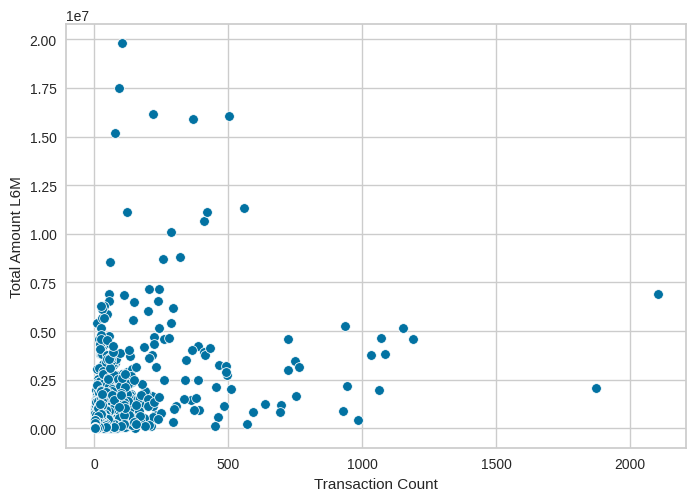

In [ ]:

# raw data without scaling
raw_scatter = sns.scatterplot(data = customer, x = 'increment_id', y = 'grand_totals')
plt.xlabel('Transaction Count')
plt.ylabel('Total Amount L6M')

In [ ]:
df_eda = df_clean[df_clean['status'] == 'canceled']

In [ ]:
df_eda.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,bi_status,MV,Year,Month,customer_since,m_y,FY,customer_id,grand_totals,negative_ttls
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444.0,Beauty & Grooming,\N,...,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,240.0,False
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445.0,Women's Fashion,\N,...,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,2450.0,False
4,211136.0,canceled,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447.0,Snacks,\N,...,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,1110.0,False
5,211137.0,canceled,2016-07-01,UK_Namkino All In One 200 Gms,80.0,1.0,80.0,100147448.0,Snacks,\N,...,Gross,80,2016.0,7.0,2016-7,7-2016,FY17,6.0,80.0,False
8,211140.0,canceled,2016-07-01,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,100147451.0,Mobiles & Tablets,\N,...,Gross,"96,499",2016.0,7.0,2016-7,7-2016,FY17,8.0,96499.0,False


In [ ]:
df_eda_can = df_clean[df_clean['status'] == 'canceled']

In [ ]:
df_eda_can.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,bi_status,MV,Year,Month,customer_since,m_y,FY,customer_id,grand_totals,negative_ttls
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444.0,Beauty & Grooming,\N,...,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,240.0,False
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445.0,Women's Fashion,\N,...,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,2450.0,False
4,211136.0,canceled,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447.0,Snacks,\N,...,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,1110.0,False
5,211137.0,canceled,2016-07-01,UK_Namkino All In One 200 Gms,80.0,1.0,80.0,100147448.0,Snacks,\N,...,Gross,80,2016.0,7.0,2016-7,7-2016,FY17,6.0,80.0,False
8,211140.0,canceled,2016-07-01,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,100147451.0,Mobiles & Tablets,\N,...,Gross,"96,499",2016.0,7.0,2016-7,7-2016,FY17,8.0,96499.0,False


In [ ]:
df_eda_com = df_clean[df_clean['status'] == 'complete']
df_eda_com.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,bi_status,MV,Year,Month,customer_since,m_y,FY,customer_id,grand_totals,negative_ttls
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443.0,Women's Fashion,\N,...,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,1950.0,False
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446.0,Beauty & Grooming,R-FSD-52352,...,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,60.0,False
6,211138.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147449.0,Beauty & Grooming,\N,...,Net,360,2016.0,7.0,2016-7,7-2016,FY17,7.0,60.0,False
7,211139.0,complete,2016-07-01,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,100147450.0,Snacks,\N,...,Net,170,2016.0,7.0,2016-7,7-2016,FY17,6.0,170.0,False
10,211142.0,complete,2016-07-01,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",5500.0,1.0,5500.0,100147453.0,Appliances,\N,...,Net,"5,500",2016.0,7.0,2016-7,7-2016,FY17,9.0,5500.0,False


## Check Data Distribution

In [ ]:
customer = df_eda_com.groupby('customer_id').agg({
    'increment_id': 'nunique',
    'grand_totals': 'sum',
}).reset_index()

customer.head()

,customer_id,increment_id,grand_totals
0,1.0,1,1950.0
1,10.0,1,366.0
2,100.0,3,4589.0
3,1000.0,1,100999.0
4,100000.0,1,1500.0


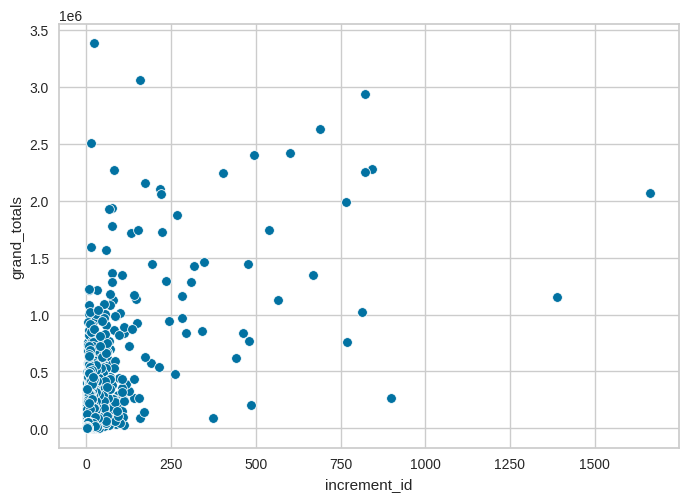

In [ ]:
raw_scatter = sns.scatterplot(data = customer, x = 'increment_id', y = 'grand_totals')


In [ ]:
customer = df_eda_can.groupby('customer_id').agg({
    'increment_id': 'nunique',
    'grand_totals': 'sum',
}).reset_index()

customer.head()

,customer_id,increment_id,grand_totals
0,100.0,1,999.0
1,1000.0,4,423996.0
2,10000.0,1,995.0
3,100001.0,1,10000.0
4,100002.0,1,1500.0


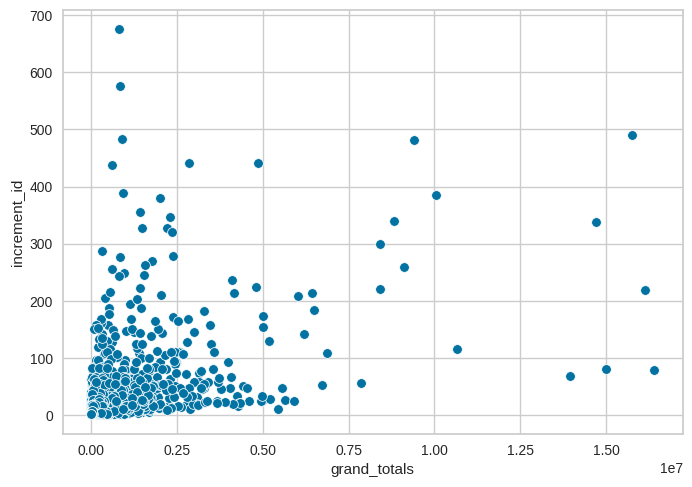

In [ ]:
raw_scatter = sns.scatterplot(data = customer, x = 'grand_totals', y = 'increment_id')


In [ ]:
df_cust_can = df_eda_can[df_eda_can['grand_totals'] > 0]

In [ ]:
customer_can = df_cust_can.groupby('customer_id').agg({
    'increment_id': 'nunique',
    'grand_totals': 'sum',
}).reset_index()

customer_can.tail()

,customer_id,increment_id,grand_totals
66899,99993.0,1,2500.0
66900,99995.0,1,2500.0
66901,99996.0,7,25000.0
66902,99998.0,2,16000.0
66903,99999.0,1,5000.0


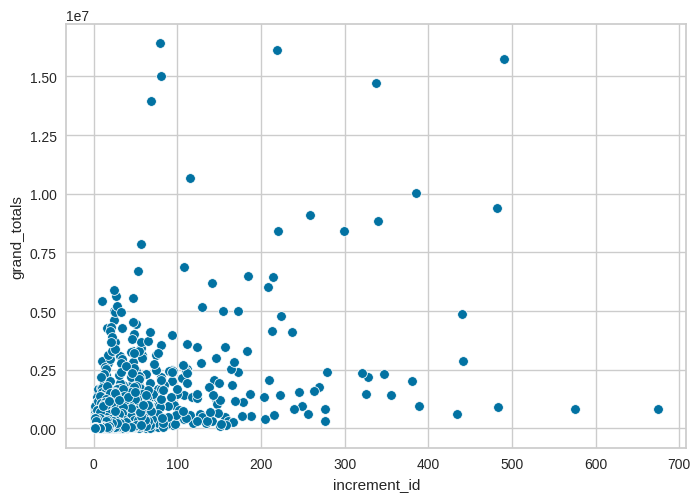

In [ ]:
raw_scatter = sns.scatterplot(data = customer_can, x = 'increment_id', y = 'grand_totals')


array([[<Axes: xlabel='increment_id', ylabel='increment_id'>,
        <Axes: xlabel='grand_totals', ylabel='increment_id'>],
       [<Axes: xlabel='increment_id', ylabel='grand_totals'>,
        <Axes: xlabel='grand_totals', ylabel='grand_totals'>]],
      dtype=object)

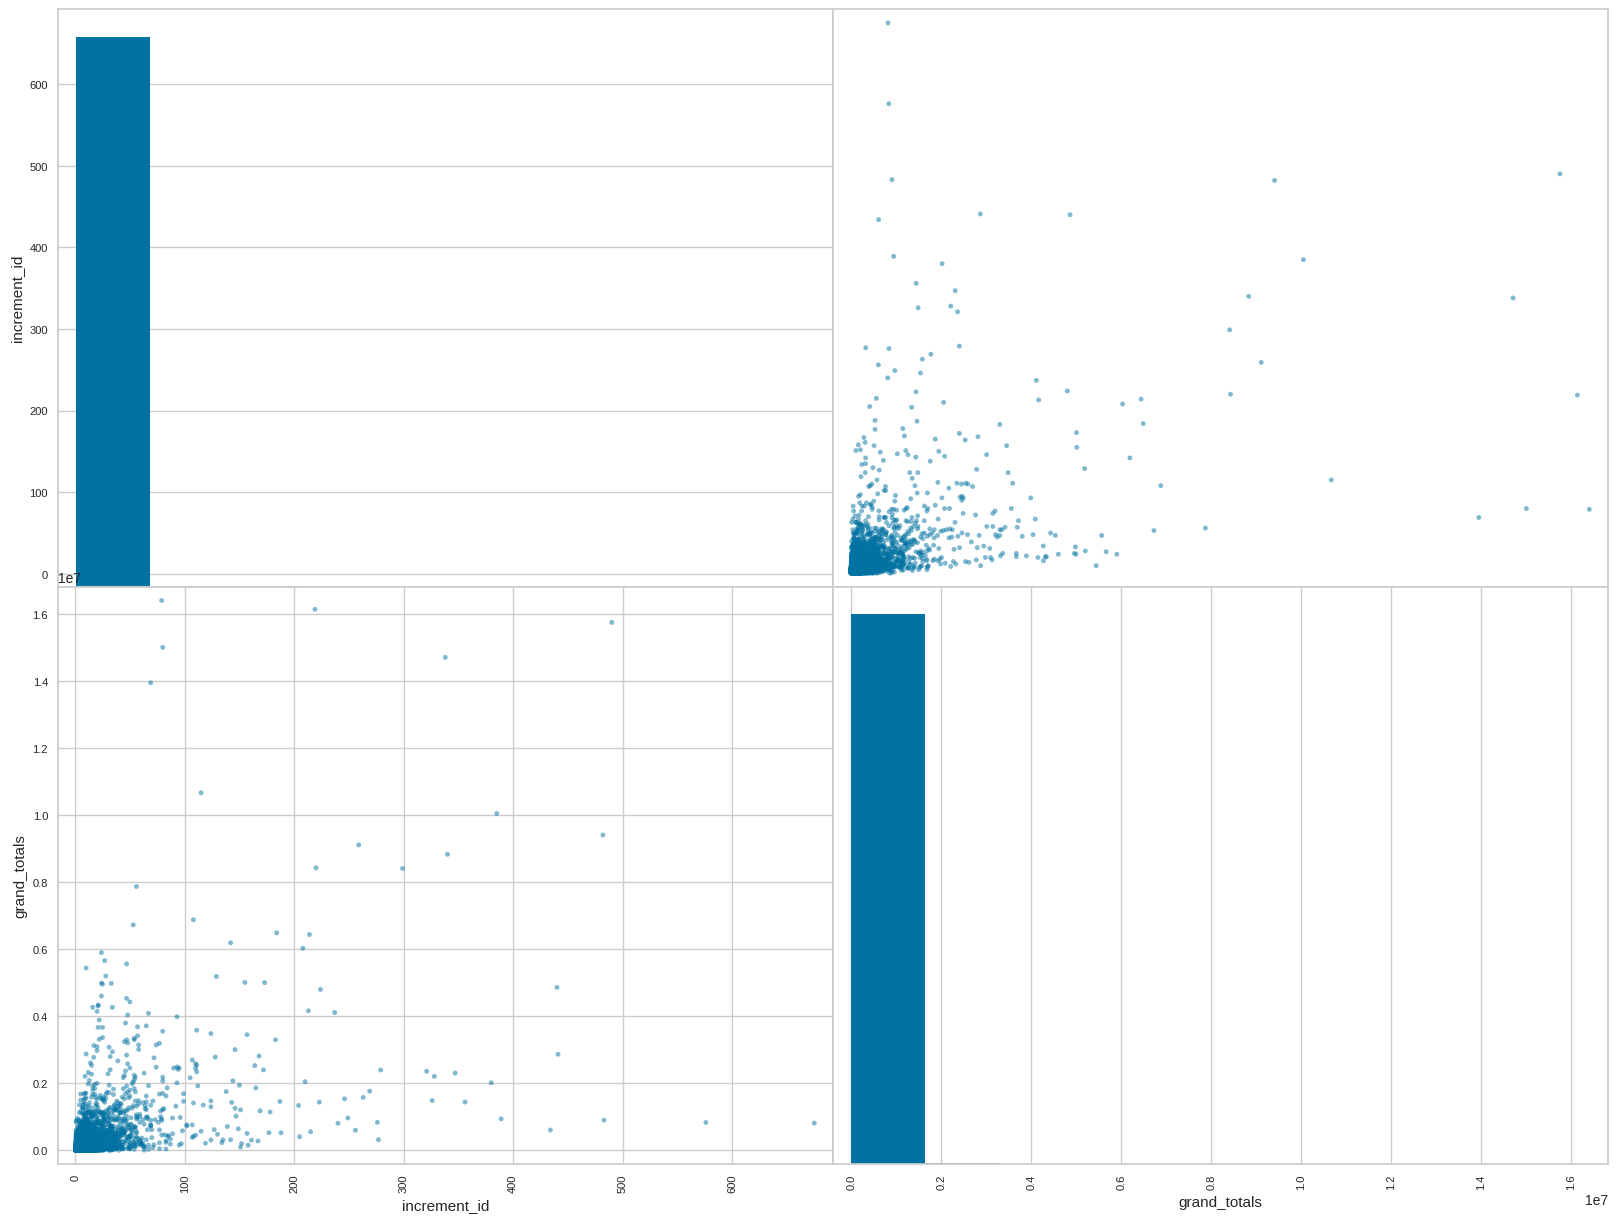

In [ ]:
scatter_matrix(customer_can, figsize = (20,15))


## RFM with K-Means Testing


In [ ]:
# create data copy
c_segment_com = df_eda_com.copy()

In [ ]:
c_segment_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308133 entries, 0 to 584519
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                308133 non-null  object        
 1   status                 308133 non-null  object        
 2   created_at             308133 non-null  datetime64[ns]
 3   sku                    308133 non-null  object        
 4   price                  308133 non-null  float64       
 5   qty_ordered            308133 non-null  float64       
 6   grand_total            308133 non-null  float64       
 7   increment_id           308133 non-null  float64       
 8   category_name_1        308123 non-null  object        
 9   sales_commission_code  249660 non-null  object        
 10  discount_amount        308133 non-null  float64       
 11  payment_method         308133 non-null  object        
 12  working_date           308133 non-null  obje

In [ ]:

c_segment_com['increment_id'].astype(np.float)
c_segment_com.info()

<ipython-input-288-78064374cf12>:1: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<class 'pandas.core.frame.DataFrame'>
Int64Index: 308133 entries, 0 to 584519
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                308133 non-null  object        
 1   status                 308133 non-null  object        
 2   created_at             308133 non-null  datetime64[ns]
 3   sku                    308133 non-null  object        
 4   price                  308133 non-null  float64       
 5   qty_ordered            308133 non-null  float64       
 6   grand_total            308133 non-null  float64       
 7   increment_id           308133 non-null  float64       
 8   category_name_1        308123 non-null  object        
 9   sales_commission_code  249660 non-null  object        
 10  discount_amount        308133 non-null  float64       
 11  payment_method         308133 non-null  object        
 12  working_date           308133 non-null  obje

### Clustering Completed

In [ ]:
col_list = ['increment_id','grand_totals']

# fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))

# for 0 (i) , Income (el)
# for i,el in enumerate(col_list):
    # a = c_segment_com.boxplot(el, ax=axes.flatten()[i],grid=False)
# plt.show()

In [ ]:
# we use RobustScaler because we have outliers in our data
scaler = RobustScaler()

# create new dataframe where we apply RobustScaler into our raw Data
robust_df = customer.copy()
robust_df[col_list] = scaler.fit_transform(robust_df[col_list])

# check the data
robust_df

,customer_id,increment_id,grand_totals
0,100.0,0.0,-0.195924
1,1000.0,1.5,21.048677
2,10000.0,0.0,-0.196125
3,100001.0,0.0,0.256142
4,100002.0,0.0,-0.170762
...,...,...,...
66998,99993.0,0.0,-0.120538
66999,99995.0,0.0,-0.120538
67000,99996.0,3.0,1.009502
67001,99998.0,0.5,0.557486


In [ ]:
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, init = 'k-means++', n_init=10)
    kmeanModel.fit(c_segment_com[['grand_totals','increment_id']]) # Ini yang diganti jadi df yang dipakai
    distortions.append(kmeanModel.inertia_)

distortions



[3996597644160777.0,
 1143823215656202.5,
 545649937528779.6,
 307214108418646.4,
 203359403459711.38,
 149458711734672.38,
 114087693427893.84,
 96262770212339.97,
 82271801754325.62,
 73537368940338.64,
 65260981175909.07,
 58436377729220.19,
 51437618393058.625,
 46851339399700.2,
 42703312159601.03]

<Figure size 1600x800 with 0 Axes>

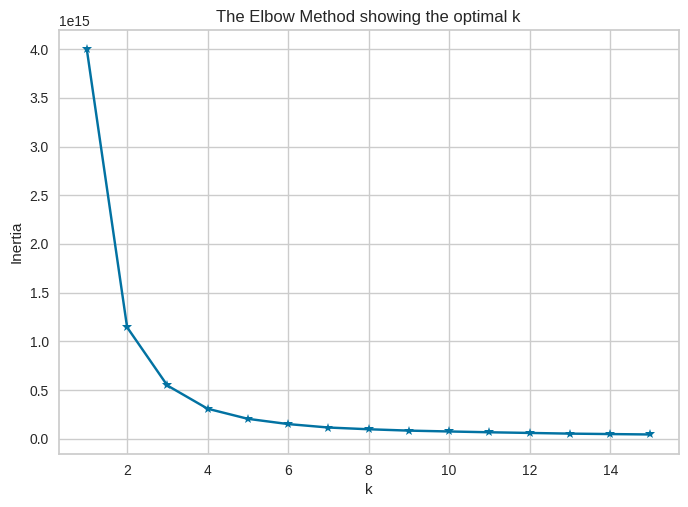

In [ ]:
plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [ ]:


#K = range(2, 8)
#silhouette_scores = []

#for n_clusters in K:
#    kmeanModel = KMeans(n_clusters)
#    kmeanModel.fit(c_segment_com[['grand_totals', 'increment_id']])
#    labels = kmeanModel.labels_
#    silhouette_avg = silhouette_score(c_segment_com[['grand_totals', 'increment_id']], labels)
#    silhouette_scores.append(silhouette_avg)
#    print(f"For k={n_clusters}, the average silhouette score is {silhouette_avg}")

# Now you have the silhouette scores for each value of k
#for n_clusters, score in zip(K, silhouette_scores):
#    print(f"For k={n_clusters}, the average silhouette score is {score}")

In [ ]:
# Initialize KMeans for 4 clusters
cluster_result_com = customer.copy()
kmeans = KMeans(n_clusters=4)
kmeans.fit(customer[['grand_totals','increment_id']])
cluster_labels = kmeans.labels_
cluster_result_com['cluster'] = cluster_labels

In [ ]:
cluster_result_com

,customer_id,increment_id,grand_totals,cluster
0,100.0,1,999.0,0
1,1000.0,4,423996.0,0
2,10000.0,1,995.0,0
3,100001.0,1,10000.0,0
4,100002.0,1,1500.0,0
...,...,...,...,...
66998,99993.0,1,2500.0,0
66999,99995.0,1,2500.0,0
67000,99996.0,7,25000.0,0
67001,99998.0,2,16000.0,0


In [ ]:
cluster_result_com['cluster'].value_counts()

0    66223
3      671
2       95
1       14
Name: cluster, dtype: int64

<Axes: xlabel='increment_id', ylabel='grand_totals'>

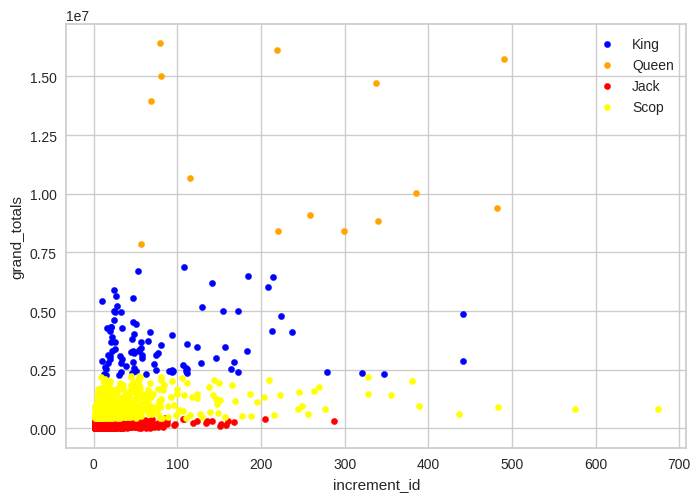

In [ ]:
ax = cluster_result_com[cluster_result_com['cluster'] == 2].plot.scatter(x='increment_id', y='grand_totals', c='blue', label='King')
ax = cluster_result_com[cluster_result_com['cluster'] == 1].plot.scatter(x='increment_id', y='grand_totals', c='orange', label='Queen', ax=ax)
ax = cluster_result_com[cluster_result_com['cluster'] == 0].plot.scatter(x='increment_id', y='grand_totals', c='red', label='Jack', ax=ax)
ax = cluster_result_com[cluster_result_com['cluster'] == 3].plot.scatter(x='increment_id', y='grand_totals', c='yellow', label='Scop', ax=ax)
ax

### Clustering Cancel

In [ ]:
# we use RobustScaler because we have outliers in our data
scaler = RobustScaler()

# create new dataframe where we apply RobustScaler into our raw Data
robust_df_can = customer_can.copy()
robust_df_can[col_list] = scaler.fit_transform(robust_df_can[col_list])

# check the data
robust_df_can

,customer_id,increment_id,grand_totals
0,100.0,0.0,-0.194619
1,1000.0,1.5,20.896087
2,10000.0,0.0,-0.194819
3,100001.0,0.0,0.254172
4,100002.0,0.0,-0.169639
...,...,...,...
66899,99993.0,0.0,-0.119779
66900,99995.0,0.0,-0.119779
66901,99996.0,3.0,1.002075
66902,99998.0,0.5,0.553333


In [ ]:
distortions_can = []
K = range(1,16)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, init = 'k-means++', n_init=10)
    kmeanModel.fit(df_cust_can[['grand_totals','increment_id']]) # Ini yang diganti jadi df yang dipakai
    distortions_can.append(kmeanModel.inertia_)

distortions_can



[3653485003656897.0,
 1109789333844808.2,
 548294478868415.0,
 355003324976694.25,
 278176805230384.7,
 229461314836078.8,
 185608260576612.72,
 158870889856666.0,
 142275526224332.2,
 126905578391503.44,
 113721719114069.45,
 102002480955300.98,
 91044258428887.06,
 83933806261573.0,
 77324460727378.4]

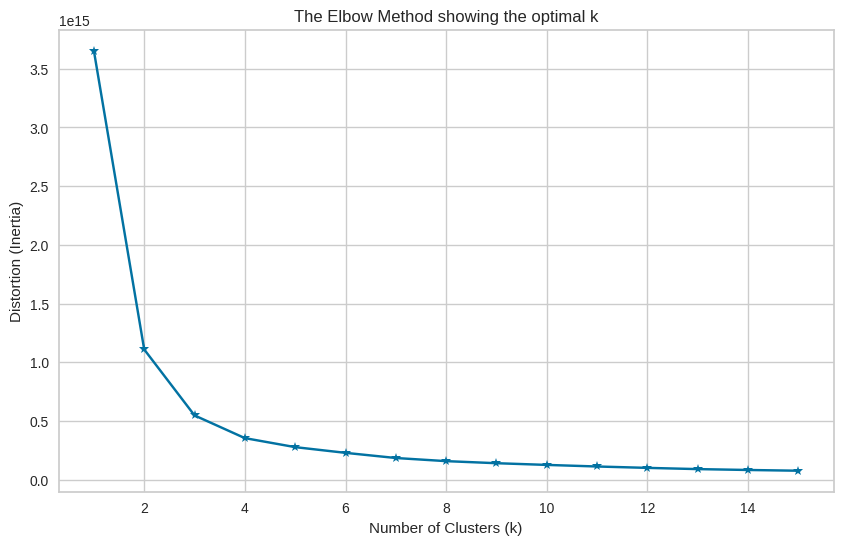

In [ ]:
# Assuming df_cust_can is your DataFrame containing data

distortions_can = []
K = range(1, 16)

for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, init='k-means++', n_init=10)
    kmeanModel.fit(df_cust_can[['grand_totals', 'increment_id']])
    distortions_can.append(kmeanModel.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, distortions_can, 'b*-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Initialize KMeans for 4 clusters
cluster_result_can = customer_can.copy()
kmeans = KMeans(n_clusters=4)
kmeans.fit(customer_can[['grand_totals','increment_id']])
cluster_labels = kmeans.labels_
cluster_result_can['cluster'] = cluster_labels

In [ ]:
cluster_result_can

,customer_id,increment_id,grand_totals,cluster
0,100.0,1,999.0,0
1,1000.0,4,423996.0,0
2,10000.0,1,995.0,0
3,100001.0,1,10000.0,0
4,100002.0,1,1500.0,0
...,...,...,...,...
66899,99993.0,1,2500.0,0
66900,99995.0,1,2500.0,0
66901,99996.0,7,25000.0,0
66902,99998.0,2,16000.0,0


In [ ]:
cluster_result_can['cluster'].value_counts()

0    66124
3      671
2       95
1       14
Name: cluster, dtype: int64

## RFM with Scoring Method

In [ ]:
df_rfm_com = df_clean[df_clean['status'] == 'complete']

In [ ]:
df_rfm_can = df_clean[df_clean['status'] == 'canceled']

###Data Preparation

In [ ]:
base = df_clean.copy()

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572622 entries, 0 to 584523
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                572622 non-null  object        
 1   status                 572608 non-null  object        
 2   created_at             572622 non-null  datetime64[ns]
 3   sku                    572619 non-null  object        
 4   price                  572622 non-null  float64       
 5   qty_ordered            572622 non-null  float64       
 6   grand_total            572622 non-null  float64       
 7   increment_id           572622 non-null  float64       
 8   category_name_1        572460 non-null  object        
 9   sales_commission_code  444474 non-null  object        
 10  discount_amount        572622 non-null  float64       
 11  payment_method         572622 non-null  object        
 12  working_date           572622 non-null  obje

In [ ]:
# create new variable to get the recency data
timebound = base['created_at'].max()

In [ ]:
# We Group the data to see unique user characteristics (number of transactions and the amount)
customer_rfm = base.groupby('customer_id').agg({'created_at' : lambda x : (timebound- x.max()).days,
                                        'increment_id' : 'nunique',
                                        'grand_totals' : 'sum'}).reset_index()
customer_rfm.columns = ['customer_id','Recency','Frequency','Monetary Value']

In [ ]:
customer_rfm.describe()

,Recency,Frequency,Monetary Value
count,114875.000000,114875.000000,1.148750e+05
mean,355.096923,3.543861,3.363419e+04
std,207.244717,17.733675,2.229511e+05
min,0.000000,1.000000,0.000000e+00
25%,172.000000,1.000000,1.100000e+03
50%,289.000000,1.000000,3.570000e+03
75%,531.000000,3.000000,1.689900e+04
max,788.000000,2106.000000,1.978057e+07


In [ ]:
customer_rfm

,customer_id,Recency,Frequency,Monetary Value
0,1.0,788,1,1950.0
1,10.0,788,1,366.0
2,100.0,244,4,5588.0
3,1000.0,776,5,524995.0
4,10000.0,697,1,995.0
...,...,...,...,...
114870,99995.0,154,1,2500.0
114871,99996.0,154,10,41000.0
114872,99997.0,154,1,10000.0
114873,99998.0,154,3,24000.0


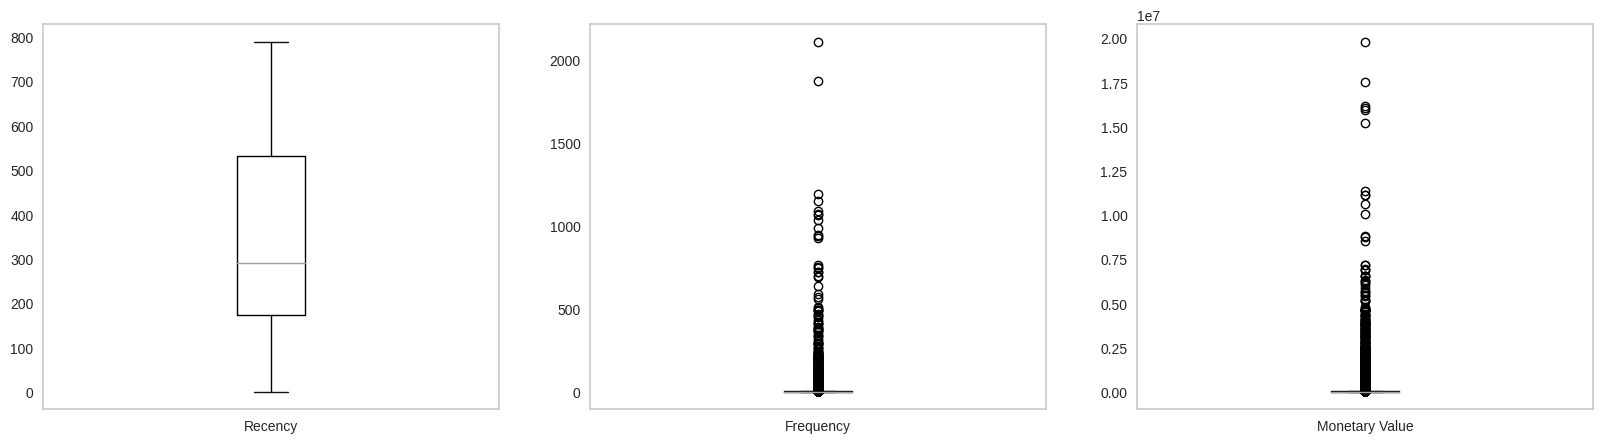

In [ ]:
# filter numeric column
col_list = ['Recency','Frequency','Monetary Value']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

# for 0 (i) , Income (el)
for i,el in enumerate(col_list):
    a = customer_rfm.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

## Clustering

In [ ]:
rfm  = customer_rfm.copy()

In [ ]:
rfm.columns = ['customer_id','recency','frequency','monetary']

In [ ]:
rfm.describe()

,recency,frequency,monetary
count,114875.000000,114875.000000,1.148750e+05
mean,355.096923,3.543861,3.363419e+04
std,207.244717,17.733675,2.229511e+05
min,0.000000,1.000000,0.000000e+00
25%,172.000000,1.000000,1.100000e+03
50%,289.000000,1.000000,3.570000e+03
75%,531.000000,3.000000,1.689900e+04
max,788.000000,2106.000000,1.978057e+07


###Scoring

In [ ]:
# Rscore
df_rfm_score = rfm.copy()
RFM_quantiles = df_rfm_score[['recency', 'frequency', 'monetary']].quantile(q = [0.2, 0.4, 0.6, 0.8])

df_rfm_score.loc[(df_rfm_score['recency'] <= RFM_quantiles.recency[0.2]), 'Rscore'] = 5.0
df_rfm_score.loc[(df_rfm_score['recency'] > RFM_quantiles.recency[0.2]) & (df_rfm_score['recency'] <= RFM_quantiles.recency[0.4]), 'Rscore'] = 4.0
df_rfm_score.loc[(df_rfm_score['recency'] > RFM_quantiles.recency[0.4]) & (df_rfm_score['recency'] <= RFM_quantiles.recency[0.6]), 'Rscore'] = 3.0
df_rfm_score.loc[(df_rfm_score['recency'] > RFM_quantiles.recency[0.6]) & (df_rfm_score['recency'] <= RFM_quantiles.recency[0.8]), 'Rscore'] = 2.0
df_rfm_score.loc[(df_rfm_score['recency'] > RFM_quantiles.recency[0.8]), 'Rscore'] = 1.0

# Fscore
df_rfm_score.loc[(df_rfm_score['frequency'] <= RFM_quantiles.frequency[0.2]), 'Fscore'] = 1.0
df_rfm_score.loc[(df_rfm_score['frequency'] > RFM_quantiles.frequency[0.2]) & (df_rfm_score['frequency'] <= RFM_quantiles.frequency[0.4]), 'Fscore'] = 2.0
df_rfm_score.loc[(df_rfm_score['frequency'] > RFM_quantiles.frequency[0.4]) & (df_rfm_score['frequency'] <= RFM_quantiles.frequency[0.6]), 'Fscore'] = 3.0
df_rfm_score.loc[(df_rfm_score['frequency'] > RFM_quantiles.frequency[0.6]) & (df_rfm_score['frequency'] <= RFM_quantiles.frequency[0.8]), 'Fscore'] = 4.0
df_rfm_score.loc[(df_rfm_score['frequency'] > RFM_quantiles.frequency[0.8]), 'Fscore'] = 5.0

# Mscore
df_rfm_score.loc[(df_rfm_score['monetary'] <= RFM_quantiles.monetary[0.2]), 'Mscore'] = 1.0
df_rfm_score.loc[(df_rfm_score['monetary'] > RFM_quantiles.monetary[0.2]) & (df_rfm_score['monetary'] <= RFM_quantiles.monetary[0.4]), 'Mscore'] = 2.0
df_rfm_score.loc[(df_rfm_score['monetary'] > RFM_quantiles.monetary[0.4]) & (df_rfm_score['monetary'] <= RFM_quantiles.monetary[0.6]), 'Mscore'] = 3.0
df_rfm_score.loc[(df_rfm_score['monetary'] > RFM_quantiles.monetary[0.6]) & (df_rfm_score['monetary'] <= RFM_quantiles.monetary[0.8]), 'Mscore'] = 4.0
df_rfm_score.loc[(df_rfm_score['monetary'] > RFM_quantiles.monetary[0.8]), 'Mscore'] = 5.0

In [ ]:
df_rfm_score.head()

,customer_id,recency,frequency,monetary,Rscore,Fscore,Mscore
0,1.0,788,1,1950.0,1.0,1.0,2.0
1,10.0,788,1,366.0,1.0,1.0,1.0
2,100.0,244,4,5588.0,4.0,4.0,3.0
3,1000.0,776,5,524995.0,1.0,5.0,5.0
4,10000.0,697,1,995.0,1.0,1.0,2.0


In [ ]:
df_rfm_score['rfm_score'] = df_rfm_score[['Rscore','Fscore','Mscore']].sum(axis=1)

In [ ]:
df_rfm_score

,customer_id,recency,frequency,monetary,Rscore,Fscore,Mscore,rfm_score
0,1.0,788,1,1950.0,1.0,1.0,2.0,4.0
1,10.0,788,1,366.0,1.0,1.0,1.0,3.0
2,100.0,244,4,5588.0,4.0,4.0,3.0,11.0
3,1000.0,776,5,524995.0,1.0,5.0,5.0,11.0
4,10000.0,697,1,995.0,1.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...
114870,99995.0,154,1,2500.0,5.0,1.0,3.0,9.0
114871,99996.0,154,10,41000.0,5.0,5.0,5.0,15.0
114872,99997.0,154,1,10000.0,5.0,1.0,4.0,10.0
114873,99998.0,154,3,24000.0,5.0,4.0,4.0,13.0


In [ ]:
df_rfm_score['rfm_score'].value_counts()

7.0     13291
6.0     12519
8.0     11809
9.0     10430
5.0     10202
10.0     8529
4.0      8163
11.0     8131
12.0     7607
3.0      7232
13.0     6994
14.0     5905
15.0     4063
Name: rfm_score, dtype: int64

In [ ]:
df_rfm_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114875 entries, 0 to 114874
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  114875 non-null  object 
 1   recency      114875 non-null  int64  
 2   frequency    114875 non-null  int64  
 3   monetary     114875 non-null  float64
 4   Rscore       114875 non-null  float64
 5   Fscore       114875 non-null  float64
 6   Mscore       114875 non-null  float64
 7   rfm_score    114875 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 7.0+ MB


###Labeling

In [ ]:
#based on RFM_Score
df_rfm_score['level'] = 'Bronze'
df_rfm_score.loc[df_rfm_score['rfm_score']>6,'level'] = 'Silver'
df_rfm_score.loc[df_rfm_score['rfm_score']>10,'level'] = 'Gold'
df_rfm_score.loc[df_rfm_score['rfm_score']>13,'level'] = 'Platinum'
df_rfm_score.head()

,customer_id,recency,frequency,monetary,Rscore,Fscore,Mscore,rfm_score,level
0,1.0,788,1,1950.0,1.0,1.0,2.0,4.0,Bronze
1,10.0,788,1,366.0,1.0,1.0,1.0,3.0,Bronze
2,100.0,244,4,5588.0,4.0,4.0,3.0,11.0,Gold
3,1000.0,776,5,524995.0,1.0,5.0,5.0,11.0,Gold
4,10000.0,697,1,995.0,1.0,1.0,2.0,4.0,Bronze


In [ ]:
df_rfm_score = df_rfm_score[['customer_id', 'level']]
df_rfm_score.head()

,customer_id,level
0,1.0,Bronze
1,10.0,Bronze
2,100.0,Platinum
3,1000.0,Platinum
4,10000.0,Bronze


In [ ]:
# Aggregate data by each customer
fig1 = df_rfm_score.groupby('level').agg({'customer_id': lambda x: len(x)}).reset_index()

# Rename columns
fig1.rename(columns={'customer_id': 'Count'}, inplace=True)
fig1['percent'] = (fig1['Count'] / fig1['Count'].sum()) * 100
fig1['percent'] = fig1['percent'].round(1)

fig1.head()

,level,Count,percent
0,Bronze,25597,22.3
1,Gold,18959,16.5
2,Platinum,32700,28.5
3,Silver,37619,32.7


In [ ]:
#Treemap
colors=['#e5e4e2','#c0c0c0','#6A3805','#d4af37'] #color palette

fig = px.treemap(fig1, path=['level'],values='Count'
                 , width=800, height=400
                 ,title="Customer Level")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

#**EDA CLUSTER RESULT**

###Select Column for EDA Clustering

In [ ]:
eda_cluster = df_clean[['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_totals', 'increment_id', 'category_name_1',
        'discount_amount', 'payment_method',
       'customer_since', 'customer_id']]

eda_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572622 entries, 0 to 584523
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          572622 non-null  object        
 1   status           572608 non-null  object        
 2   created_at       572622 non-null  datetime64[ns]
 3   sku              572619 non-null  object        
 4   price            572622 non-null  float64       
 5   qty_ordered      572622 non-null  float64       
 6   grand_totals     572622 non-null  float64       
 7   increment_id     572622 non-null  float64       
 8   category_name_1  572460 non-null  object        
 9   discount_amount  572622 non-null  float64       
 10  payment_method   572622 non-null  object        
 11  customer_since   572622 non-null  object        
 12  customer_id      572622 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 61.2+ MB


### Merge dataset with RFM Score

In [ ]:
#merge the dataset
df_clustering = eda_cluster.merge(df_rfm_score[['customer_id','level']], how = 'left', on = 'customer_id')
df_clustering

,item_id,status,created_at,sku,price,qty_ordered,grand_totals,increment_id,category_name_1,discount_amount,payment_method,customer_since,customer_id,level
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443.0,Women's Fashion,0.0,cod,2016-7,1.0,Bronze
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444.0,Beauty & Grooming,0.0,cod,2016-7,2.0,Bronze
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445.0,Women's Fashion,0.0,cod,2016-7,3.0,Silver
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446.0,Beauty & Grooming,300.0,cod,2016-7,4.0,Platinum
4,211136.0,canceled,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447.0,Snacks,0.0,cod,2016-7,5.0,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572617,905204.0,complete,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,699.0,100562385.0,Women's Fashion,0.0,cod,2018-8,115320.0,Platinum
572618,905205.0,incomplete,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35599.0,100562386.0,Mobiles & Tablets,0.0,bank_transfer,2018-8,115326.0,Platinum
572619,905206.0,incomplete,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,259998.0,100562387.0,Mobiles & Tablets,0.0,bank_transfer,2018-7,113474.0,Platinum
572620,905207.0,incomplete,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,174600.0,100562387.0,Mobiles & Tablets,0.0,bank_transfer,2018-7,113474.0,Platinum


In [ ]:
# Aggregate data by each customer
fig2 = df_clustering.groupby('level').agg({'customer_id': 'nunique'}).reset_index()

# Rename columns
fig2.rename(columns={'customer_id': 'Count'}, inplace=True)
fig2['percent'] = (fig2['Count'] / fig2['Count'].sum()) * 100
fig2['percent'] = fig2['percent'].round(1)

fig2.head()

,level,Count,percent
0,Bronze,25597,22.3
1,Gold,18959,16.5
2,Platinum,32700,28.5
3,Silver,37619,32.7


### Customer Level Cluster

In [ ]:
#Treemap
colors=['#e5e4e2','#c0c0c0','#6A3805','#d4af37'] #color palette

fig2 = px.treemap(fig2, path=['level'],values='Count'
                 , width=800, height=400
                 ,title="Customer Level")

fig2.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig2.data[0].textinfo = 'label+text+value+percent root'
fig2.show()

In [ ]:
df_clustering['status'].value_counts()

complete      308133
canceled      264302
incomplete       173
Name: status, dtype: int64

In [ ]:
df_clustering['customer_id'].value_counts()

85775.0     2524
163.0       2347
35.0        1877
33.0        1397
31025.0     1369
            ... 
52007.0        1
52010.0        1
52013.0        1
52017.0        1
115326.0       1
Name: customer_id, Length: 114875, dtype: int64

###Total Transaction comparison by Status and Cluster

In [ ]:
# Total Increment ID by Status Clustering

df_stat = df_clustering['status'].isin(['canceled', 'complete'])

lvl_increment = df_clustering.loc[df_stat].groupby(['level', 'status']).agg({

    'increment_id':'nunique',
    'customer_id':'nunique',

    }).reset_index()


lvl_increment

,level,status,increment_id,customer_id
0,Bronze,canceled,8400,8245
1,Bronze,complete,18068,17676
2,Gold,canceled,21327,13046
3,Gold,complete,21942,12284
4,Platinum,canceled,150838,28073
5,Platinum,complete,137302,25765
6,Silver,canceled,20455,17639
7,Silver,complete,28628,23970


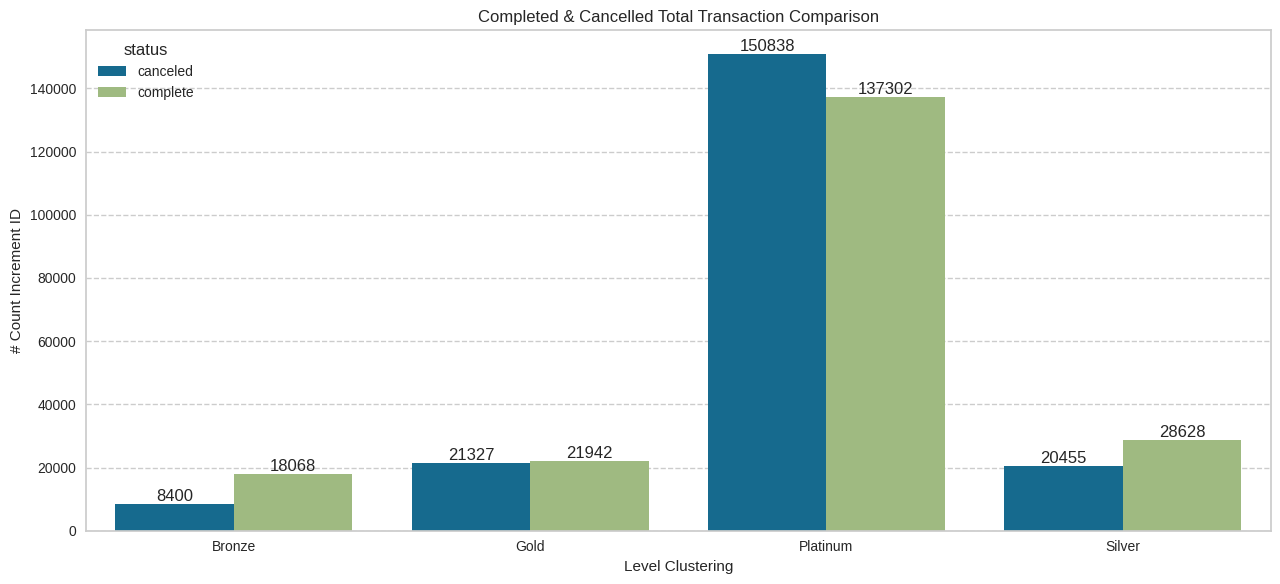

In [ ]:
plt.figure(figsize=(25, 6))

# First subplot
ax = plt.subplot(1, 2, 1)
sns.barplot(x='level', y='increment_id', hue='status', data=lvl_increment)
plt.title('Completed & Cancelled Total Transaction Comparison')
plt.xlabel('Level Clustering')
plt.ylabel('# Count Increment ID')
plt.legend(title='status', loc='upper left')

# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

##Completed Comparison by Category and Cluster

In [ ]:
#category Transaction User ID

clus_completed = df_clustering['status'].isin(['complete'])
clus_completed = df_clustering['category_name_1'].isin(['Mobiles & Tablets', 'Appliances', 'Entertainment', 'Computing'])

Cat_com = df_clustering.loc[clus_completed].groupby(['level', 'category_name_1']).agg({
    'increment_id':'nunique',
    'grand_totals':'sum',
    'customer_id':'nunique'

    }).reset_index()

Cat_com['grand_totals'] = Cat_com['grand_totals'] / 1000000

Cat_com['avg_trans_(rb)'] = Cat_com['grand_totals'] / Cat_com['increment_id'] * 1000

Cat_com.round(2)

,level,category_name_1,increment_id,grand_totals,customer_id,avg_trans_(rb)
0,Bronze,Appliances,1199,1.99,1193,1.66
1,Bronze,Computing,873,0.86,855,0.99
2,Bronze,Entertainment,371,0.87,371,2.35
3,Bronze,Mobiles & Tablets,4854,3.91,4707,0.81
4,Gold,Appliances,4366,41.23,2922,9.44
5,Gold,Computing,1685,15.01,1165,8.91
6,Gold,Entertainment,1841,30.54,1371,16.59
7,Gold,Mobiles & Tablets,9369,122.32,5862,13.06
8,Platinum,Appliances,37961,486.52,9722,12.82
9,Platinum,Computing,10433,145.45,3923,13.94


In [ ]:
Cat_com['customer_id'].sum()

69289

###Completed Total Transaction Comparison by Category

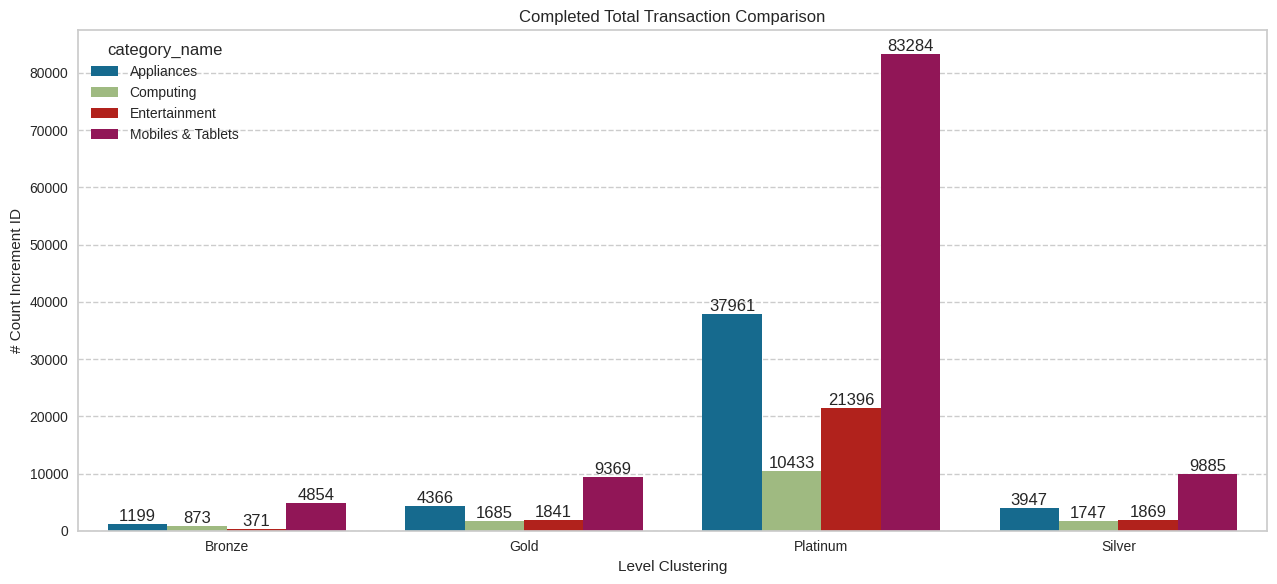

In [ ]:
plt.figure(figsize=(25, 6))

# First subplot
ax = plt.subplot(1, 2, 1)
sns.barplot(x='level', y='increment_id', hue='category_name_1', data=Cat_com)
plt.title('Completed Total Transaction Comparison')
plt.xlabel('Level Clustering')
plt.ylabel('# Count Increment ID')
plt.legend(title='category_name', loc='upper left')

# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


###Completed Revenue Comparison by Category

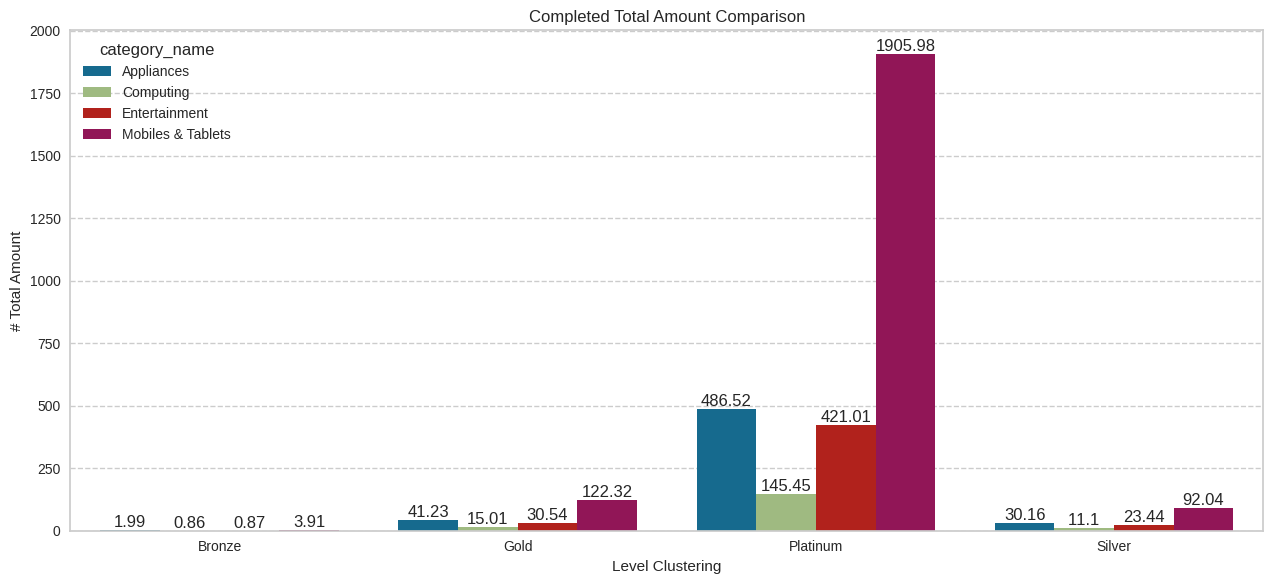

In [ ]:
plt.figure(figsize=(25, 6))

# First subplot
ax = plt.subplot(1, 2, 1)
sns.barplot(x='level', y='grand_totals', hue='category_name_1', data=Cat_com.round(2))
plt.title('Completed Total Amount Comparison')
plt.xlabel('Level Clustering')
plt.ylabel('# Total Amount')
plt.legend(title='category_name', loc='upper left')

# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

###Completed Total Customer Comparison by Category

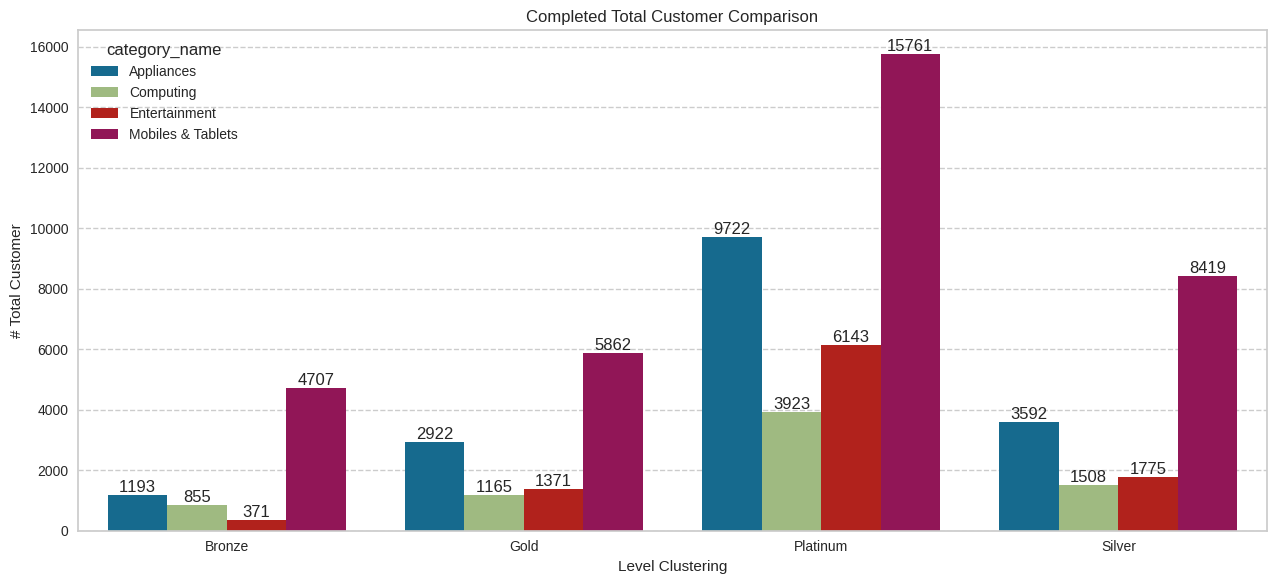

In [ ]:
plt.figure(figsize=(25, 6))

# First subplot
ax = plt.subplot(1, 2, 1)
sns.barplot(x='level', y='customer_id', hue='category_name_1', data=Cat_com.round(2))
plt.title('Completed Total Customer Comparison')
plt.xlabel('Level Clustering')
plt.ylabel('# Total Customer')
plt.legend(title='category_name', loc='upper left')

# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

## Completed & Cancelled Total Customer Comparison by Cluster

In [ ]:
# Total Increment ID by Status Clustering

df_stat = df_clustering['status'].isin(['canceled', 'complete'])

lvl_cust = df_clustering.loc[df_stat].groupby(['level', 'status']).agg({

    'customer_id':'nunique',

    }).reset_index()


lvl_cust

,level,status,customer_id
0,Bronze,canceled,8245
1,Bronze,complete,17676
2,Gold,canceled,13046
3,Gold,complete,12284
4,Platinum,canceled,28073
5,Platinum,complete,25765
6,Silver,canceled,17639
7,Silver,complete,23970


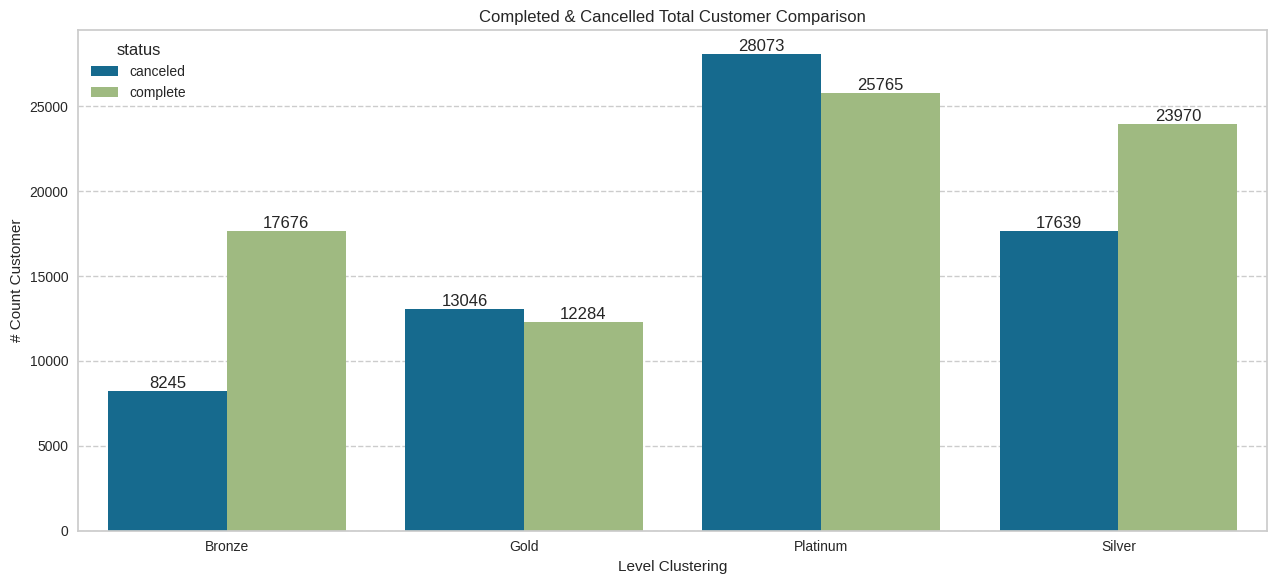

In [ ]:
plt.figure(figsize=(25, 6))

# First subplot
ax = plt.subplot(1, 2, 1)
sns.barplot(x='level', y='customer_id', hue='status', data=lvl_cust)
plt.title('Completed & Cancelled Total Customer Comparison')
plt.xlabel('Level Clustering')
plt.ylabel('# Count Customer')
plt.legend(title='status', loc='upper left')

# Add labels to histogram bars
for i in ax.containers:
    ax.bar_label(i)

plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

#Export File to Excel

In [ ]:
df_clustering.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572622 entries, 0 to 572621
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          572622 non-null  object        
 1   status           572608 non-null  object        
 2   created_at       572622 non-null  datetime64[ns]
 3   sku              572619 non-null  object        
 4   price            572622 non-null  float64       
 5   qty_ordered      572622 non-null  float64       
 6   grand_totals     572622 non-null  float64       
 7   increment_id     572622 non-null  float64       
 8   category_name_1  572460 non-null  object        
 9   discount_amount  572622 non-null  float64       
 10  payment_method   572622 non-null  object        
 11  customer_since   572622 non-null  object        
 12  customer_id      572622 non-null  object        
 13  level            572622 non-null  object        
dtypes: datetime64[ns](1)

##Filter Status Order

In [ ]:
#filter cancel & complete only

df_clustering2 = df_clustering['status'].isin(['canceled', 'complete'])

AOV_stat2 = df_clustering.loc[df_clustering2]
AOV_stat2['status'].value_counts()


complete    308133
canceled    264302
Name: status, dtype: int64

In [ ]:
# AOV_stat2.to_excel('AOV_stat2.xlsx')

In [ ]:
AOV_stat2['category_name_1'].value_counts()

Mobiles & Tablets     114903
Men's Fashion          90875
Women's Fashion        58262
Appliances             51665
Superstore             41010
Beauty & Grooming      40197
Others                 36923
Snacks                 33369
Entertainment          26258
Home & Living          25663
Health & Sports        17040
Kids & Baby            15898
Computing              15730
School & Education      3290
Books                   1190
Name: category_name_1, dtype: int64

##Checking Revenue

In [ ]:
# We Group the data to see unique user characteristics
AOV_stata = AOV_stat2.groupby(['category_name_1']).agg({
    'grand_totals': 'sum',
}).reset_index()
AOV_stata

,category_name_1,grand_totals
0,Appliances,5.596460e+08
1,Beauty & Grooming,3.683091e+07
2,Books,9.919454e+05
3,Computing,1.721264e+08
4,Entertainment,4.755814e+08
5,Health & Sports,1.851262e+07
6,Home & Living,2.928809e+07
7,Kids & Baby,1.118000e+07
8,Men's Fashion,8.384228e+07
9,Mobiles & Tablets,2.122161e+09


##Merge Dataset

In [ ]:
#merge the dataset
df_final = AOV_stat2.merge(df_rfm_score[['customer_id','level']], how = 'left', on = 'customer_id')
df_final.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_totals,increment_id,category_name_1,discount_amount,payment_method,customer_since,customer_id,level_x,level_y
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443.0,Women's Fashion,0.0,cod,2016-7,1.0,Bronze,Bronze
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444.0,Beauty & Grooming,0.0,cod,2016-7,2.0,Bronze,Bronze
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445.0,Women's Fashion,0.0,cod,2016-7,3.0,Silver,Silver
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446.0,Beauty & Grooming,300.0,cod,2016-7,4.0,Platinum,Platinum
4,211136.0,canceled,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447.0,Snacks,0.0,cod,2016-7,5.0,Bronze,Bronze


In [ ]:
df_rfm_score[['customer_id','level']].to_excel('final.xlsx')